# Import crucial libraries for plotting and exploring data

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<p>Moreover, the link to the Airline data set already contains a test.csv and train.csv set which is not normally the case. Beacause
a dataset usually comes on its own and it will be split once we get to the Data Analysis stage, where identifying a model for predictions/classfications requires the data to be split into a training and a test set. So to solve this problem we will merge the train and test set together using the pd.concat() </p>

<h3>For good practice, we normally replace whitespace character in columns' names with '_'</h3>

In [2]:
Training_Data = pd.read_csv('train.csv', encoding = 'utf-8')
Training_Data.columns = Training_Data.columns.str.replace(' ', '_')

Testing_Data = pd.read_csv('test.csv', encoding = 'utf-8')
Testing_Data.columns = Testing_Data.columns.str.replace(' ', '_')

Full_Set = pd.concat([Training_Data, Testing_Data]).reset_index(drop=True)

## Execute the code below to create a csv file named output.csv containing all the data.

In [3]:
Full_Set.to_csv('output.csv', index=False)

<h4>We will refer to the the 'Training_Data' and 'Testing_Data' later on when we reach the model identification process.
For now, we'll use 'Full_Set' data for EDA.</h4>

In [4]:
Full_Set
Full_Set.head()

Unnamed:_0      id  Gender      Customer_Type  Age   Type_of_Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight_Distance  Inflight_wifi_service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival_time_convenient  ...  Inflight_entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight_service  Cleanliness  Departure_Delay_in_Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival_Delay_in_Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [5]:
Full_Set.tail()

Unnamed:_0     id  Gender      Customer_Type  Age   Type_of_Travel  \
129875       25971  78463    Male  disloyal Customer   34  Business travel   
129876       25972  71167    Male     Loyal Customer   23  Business travel   
129877       25973  37675  Female     Loyal Customer   17  Personal Travel   
129878       25974  90086    Male     Loyal Customer   14  Business travel   
129879       25975  34799  Female     Loyal Customer   42  Personal Travel   

           Class  Flight_Distance  Inflight_wifi_service  \
129875  Business              526                      3   
129876  Business              646                      4   
129877       Eco              828                      2   
129878  Business             1127                      3   
129879       Eco              264                      2   

        Departure/Arrival_time_convenient  ...  Inflight_entertainment  \
129875                                  3  ...                       4   
129876                                  4  ...                       4   
129877                                  5  ...                       2   
129878                                  3  ...                       4   
129879                                  5  ...                       1   

        On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
129875                 3                 2                 4                4   
129876                 4                 5                 5                5   
129877                 4                 3                 4                5   
129878                 3                 2                 5                4   
129879                 1                 2                 1                1   

        Inflight_service  Cleanliness  Departure_Delay_in_Minutes  \
129875                 5            4                           0   
129876                 5            4                           0   
129877                 4            2                           0   
129878                 5            4                           0   
129879                 1            1                           0   

        Arrival_Delay_in_Minutes             satisfaction  
129875                       0.0  neutral or dissatisfied  
129876                       0.0                satisfied  
129877                       0.0  neutral or dissatisfied  
129878                       0.0                satisfied  
129879                       0.0  neutral or dissatisfied  

[5 rows x 25 columns]

# Understanding the data

In [6]:
Full_Set.shape

(129880, 25)

In [7]:
Full_Set.columns

Index(['Unnamed:_0', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
Full_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed:_0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer_Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type_of_Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight_Distance                    129880 non-null  int64  
 8   Inflight_wifi_service              129880 non-null  int64  
 9   Departure/Arrival_time_convenient  129880 non-null  int64  
 10  Ease_of_Online_booking             129880 non-null  int64  
 11  Gate_location                      1298

### Dropping the first column

In [9]:
Full_Set.drop('Unnamed:_0', axis=1, inplace=True)

# Repeat the above processes again to check that we've removed the 'Unnamed:_0' column

In [10]:
Full_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer_Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight_Distance                    129880 non-null  int64  
 7   Inflight_wifi_service              129880 non-null  int64  
 8   Departure/Arrival_time_convenient  129880 non-null  int64  
 9   Ease_of_Online_booking             129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Food_and_drink                     1298

In [11]:
Full_Set.dtypes

id                                     int64
Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_De

In [12]:
Full_Set.isnull().sum()

id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
satisfaction                           0
dtype: int64

In [13]:
Full_Set.describe().T

count          mean           std   min  \
id                                 129880.0  64940.500000  37493.270818   1.0   
Age                                129880.0     39.427957     15.119360   7.0   
Flight_Distance                    129880.0   1190.316392    997.452477  31.0   
Inflight_wifi_service              129880.0      2.728696      1.329340   0.0   
Departure/Arrival_time_convenient  129880.0      3.057599      1.526741   0.0   
Ease_of_Online_booking             129880.0      2.756876      1.401740   0.0   
Gate_location                      129880.0      2.976925      1.278520   0.0   
Food_and_drink                     129880.0      3.204774      1.329933   0.0   
Online_boarding                    129880.0      3.252633      1.350719   0.0   
Seat_comfort                       129880.0      3.441361      1.319289   0.0   
Inflight_entertainment             129880.0      3.358077      1.334049   0.0   
On-board_service                   129880.0      3.383023      1.287099   0.0   
Leg_room_service                   129880.0      3.350878      1.316252   0.0   
Baggage_handling                   129880.0      3.632114      1.180025   1.0   
Checkin_service                    129880.0      3.306267      1.266185   0.0   
Inflight_service                   129880.0      3.642193      1.176669   0.0   
Cleanliness                        129880.0      3.286326      1.313682   0.0   
Departure_Delay_in_Minutes         129880.0     14.713713     38.071126   0.0   
Arrival_Delay_in_Minutes           129487.0     15.091129     38.465650   0.0   

                                        25%      50%       75%       max  
id                                 32470.75  64940.5  97410.25  129880.0  
Age                                   27.00     40.0     51.00      85.0  
Flight_Distance                      414.00    844.0   1744.00    4983.0  
Inflight_wifi_service                  2.00      3.0      4.00       5.0  
Departure/Arrival_time_convenient      2.00      3.0      4.00       5.0  
Ease_of_Online_booking                 2.00      3.0      4.00       5.0  
Gate_location                          2.00      3.0      4.00       5.0  
Food_and_drink                         2.00      3.0      4.00       5.0  
Online_boarding                        2.00      3.0      4.00       5.0  
Seat_comfort                           2.00      4.0      5.00       5.0  
Inflight_entertainment                 2.00      4.0      4.00       5.0  
On-board_service                       2.00      4.0      4.00       5.0  
Leg_room_service                       2.00      4.0      4.00       5.0  
Baggage_handling                       3.00      4.0      5.00       5.0  
Checkin_service                        3.00      3.0      4.00       5.0  
Inflight_service                       3.00      4.0      5.00       5.0  
Cleanliness                            2.00      3.0      4.00       5.0  
Departure_Delay_in_Minutes             0.00      0.0     12.00    1592.0  
Arrival_Delay_in_Minutes               0.00      0.0     13.00    1584.0

In [14]:
# Assuming Full_Set is a DataFrame with missing values
filled_set = Full_Set.fillna(Full_Set['Arrival_Delay_in_Minutes'].mean())
filled_set

id  Gender      Customer_Type  Age   Type_of_Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
129875   78463    Male  disloyal Customer   34  Business travel  Business   
129876   71167    Male     Loyal Customer   23  Business travel  Business   
129877   37675  Female     Loyal Customer   17  Personal Travel       Eco   
129878   90086    Male     Loyal Customer   14  Business travel  Business   
129879   34799  Female     Loyal Customer   42  Personal Travel       Eco   

        Flight_Distance  Inflight_wifi_service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
129875              526                      3   
129876              646                      4   
129877              828                      2   
129878             1127                      3   
129879              264                      2   

        Departure/Arrival_time_convenient  Ease_of_Online_booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
129875                                  3                       3  ...   
129876                                  4                       4  ...   
129877                                  5                       1  ...   
129878                                  3                       3  ...   
129879                                  5                       2  ...   

        Inflight_entertainment  On-board_service  Leg_room_service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
129875                       4                 3                 2   
129876                       4                 4                 5   
129877                       2                 4                 3   
129878                       4                 3                 2   
129879                       1                 1                 2   

        Baggage_handling  Checkin_service  Inflight_service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
129875                 4                4                 5            4   
129876                 5                5                 5            4   
129877                 4                5                 4            2

In [15]:
corr_matrix = filled_set.drop('id', axis=1).corr()
corr_matrix

C:\Users\LH\AppData\Local\Temp\ipykernel_12400\1773237820.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = filled_set.drop('id', axis=1).corr()


Age  Flight_Distance  \
Age                                1.000000         0.099459   
Flight_Distance                    0.099459         1.000000   
Inflight_wifi_service              0.016116         0.006701   
Departure/Arrival_time_convenient  0.036960        -0.018914   
Ease_of_Online_booking             0.022565         0.065165   
Gate_location                     -0.000398         0.005520   
Food_and_drink                     0.023194         0.057066   
Online_boarding                    0.207572         0.214825   
Seat_comfort                       0.159136         0.157662   
Inflight_entertainment             0.074947         0.130507   
On-board_service                   0.057078         0.111194   
Leg_room_service                   0.039119         0.134533   
Baggage_handling                  -0.047991         0.064855   
Checkin_service                    0.033475         0.073608   
Inflight_service                  -0.051347         0.059316   
Cleanliness                        0.052565         0.095648   
Departure_Delay_in_Minutes        -0.009041         0.002402   
Arrival_Delay_in_Minutes          -0.011229        -0.001932   

                                   Inflight_wifi_service  \
Age                                             0.016116   
Flight_Distance                                 0.006701   
Inflight_wifi_service                           1.000000   
Departure/Arrival_time_convenient               0.344915   
Ease_of_Online_booking                          0.714807   
Gate_location                                   0.338573   
Food_and_drink                                  0.132214   
Online_boarding                                 0.457445   
Seat_comfort                                    0.121513   
Inflight_entertainment                          0.207802   
On-board_service                                0.119928   
Leg_room_service                                0.160317   
Baggage_handling                                0.120376   
Checkin_service                                 0.043762   
Inflight_service                                0.110029   
Cleanliness                                     0.131300   
Departure_Delay_in_Minutes                     -0.015946   
Arrival_Delay_in_Minutes                       -0.017721   

                                   Departure/Arrival_time_convenient  \
Age                                                         0.036960   
Flight_Distance                                            -0.018914   
Inflight_wifi_service                                       0.344915   
Departure/Arrival_time_convenient                           1.000000   
Ease_of_Online_booking                                      0.437620   
Gate_location                                               0.447510   
Food_and_drink                                              0.000687   
Online_boarding                                             0.072287   
Seat_comfort                                                0.008666   
Inflight_entertainment                                     -0.008380   
On-board_service                                            0.067297   
Leg_room_service                                            0.010617   
Baggage_handling                                            0.070833   
Checkin_service                                             0.091132   
Inflight_service                                            0.072195   
Cleanliness                                                 0.009862   
Departure_Delay_in_Minutes                                  0.000778   
Arrival_Delay_in_Minutes                                   -0.000941   

                                   Ease_of_Online_booking  Gate_location  \
Age                                              0.022565      -0.000398   
Flight_Distance                                  0.065165       0.005520   
Inflight_wifi_service                            0.714807       0.338573   
Departure

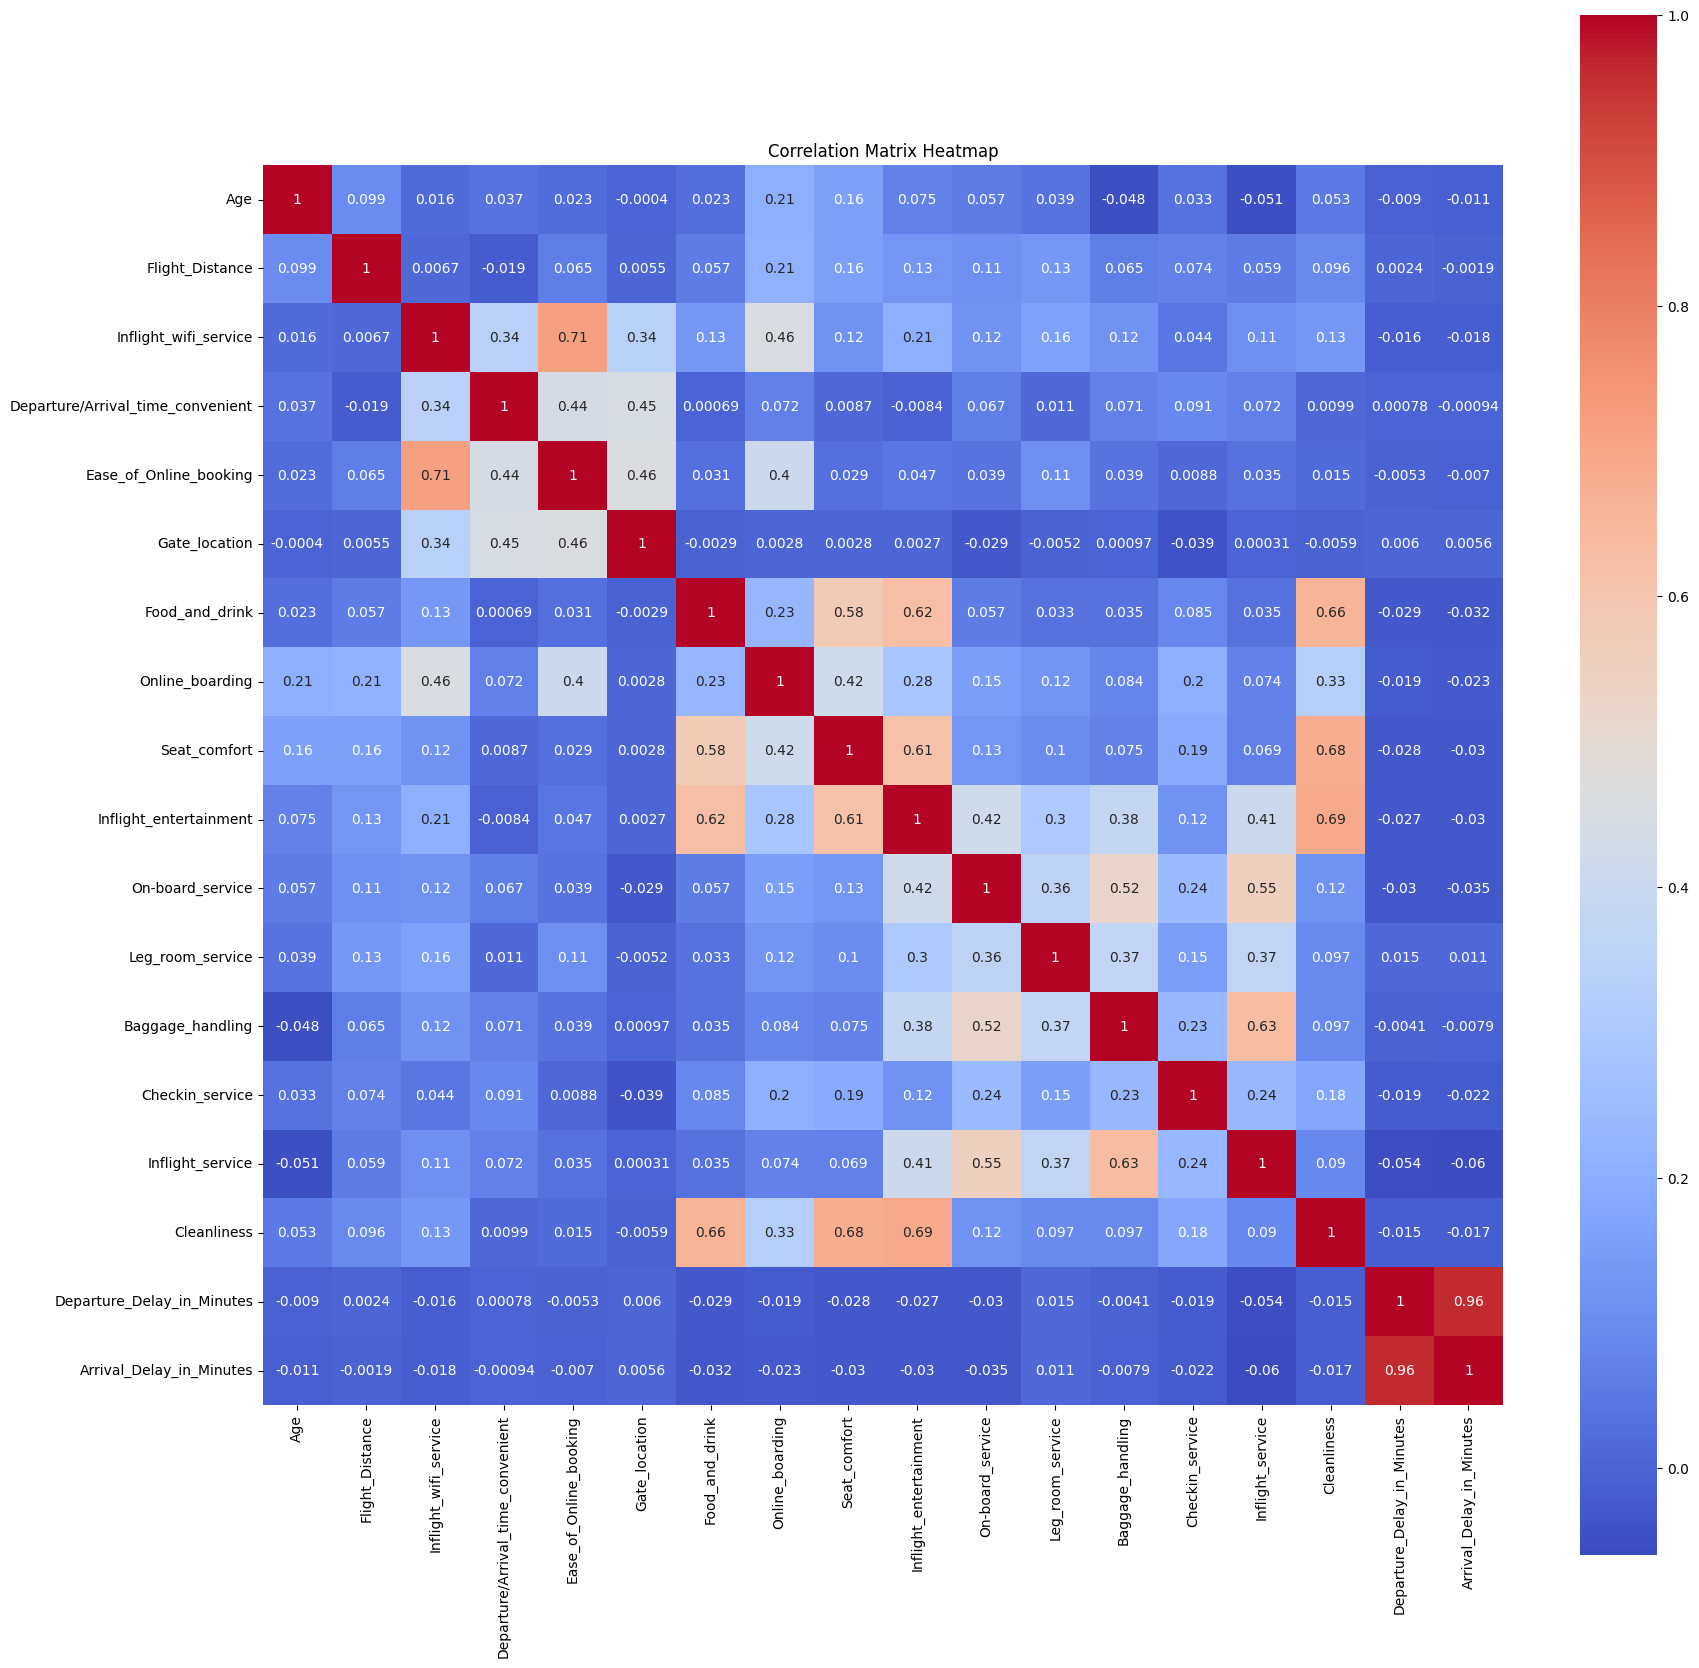

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming corr_matrix is the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

<h1>Analysis on the dataset's features</h1>


<h3>We will recall the definition of numerical and categorical variables then classify those features as one of the two and then perform futher analysis and testing. 

- Numerical features: Numerical features are variables that have a numeric value. They can be either discrete or continuous. Discrete numerical features are those that have a finite number of possible values (e.g. number of bedrooms in a house), while continuous numerical features can take any value within a range (e.g. height or weight). Examples of numerical features in our dataset include Flight_Distance, Age, Inflight_wifi_service, Departure_Delay_in_Minutes, and Arrival_Delay_in_Minutes.

- Categorical features: Categorical features are variables that have a limited number of values. They can be further classified into nominal and ordinal variables. Nominal variables are those that do not have an inherent order or rank (e.g. gender or type of travel), while ordinal variables have a specific order or rank (e.g. rating on a scale of 1-5). Examples of categorical features in our dataset include Gender, Customer_Type, Type_of_Travel, Class, and satisfaction, as well as the various service ratings such as Inflight_wifi_service and Cleanliness.</h3>

#### Now we won't do the grouping yet, we will use the pre-grouped data 'Full_Set' in our Correlation Analysis and see what happens.

# Correlation Analysis

<h4>To perform correlation analysis, we can use the corr() function to calculate the correlation matrix between all pairs of columns in the data set. Then we can use a data visualization tools such as heatmaps and scatterplots to better understand the relationships between the variables.</h4>

In [17]:
# calculate the correlation matrix
corr_matrix = Full_Set.corr()

C:\Users\LH\AppData\Local\Temp\ipykernel_12400\211183477.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Full_Set.corr()


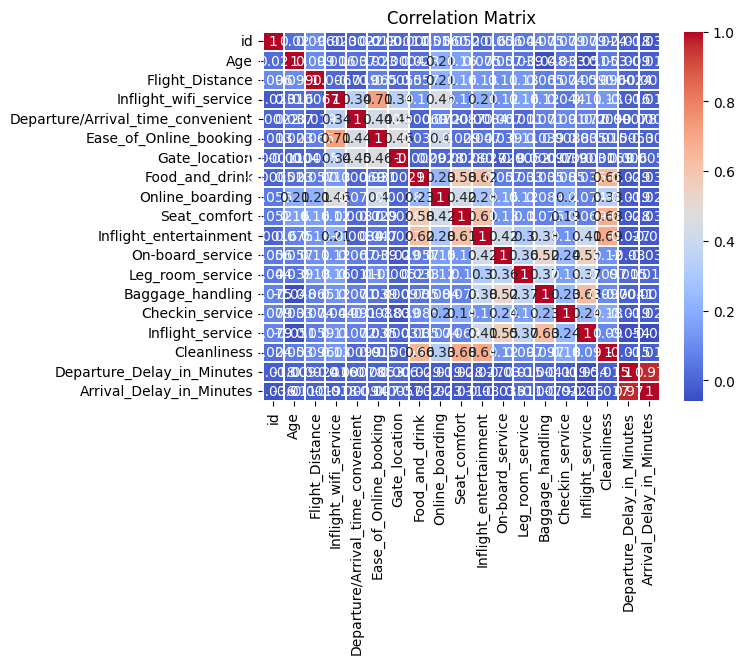

In [18]:
# plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.25)
plt.title('Correlation Matrix')
plt.show()

<p>As we can see that it is very difficult to read what's going on in the above heat map. Therefore, it is important to note that we need to identify the data type of our features clearly before diving too deep into the further analysis.</p>

<h3>Here is the grouping of our features into numerical and categorical type: </h3>

Categorical Features:
<ul>
  <li>Gender</li>
  <li>Customer_Type</li>
  <li>Type_of_Travel</li>
  <li>Class</li>
  <li>satisfaction</li>
</ul>



Numerical Features:
<ul>
  <li>Age</li>
  <li>Flight_Distance</li>
  <li>Inflight_wifi_service</li>
  <li>Departure/Arrival_time_convenient</li>
  <li>Ease_of_Online_booking</li>
  <li>Gate_location</li>
  <li>Food_and_drink</li>
  <li>Online_boarding</li>
  <li>Inflight_entertainment</li>
  <li>On-board_service</li>
  <li>Leg_room_service</li>
  <li>Baggage_handling</li>
  <li>Checkin_service</li>
  <li>Inflight_service</li>
  <li>Cleanliness</li>
  <li>Departure_Delay_in_Minutes</li>
  <li>Arrival_Delay_in_Minutes</li>
</ul>


In [19]:
Full_Set.head()

id  Gender      Customer_Type  Age   Type_of_Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight_Distance  Inflight_wifi_service  Departure/Arrival_time_convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease_of_Online_booking  ...  Inflight_entertainment  On-board_service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg_room_service  Baggage_handling  Checkin_service  Inflight_service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]

In [20]:
Full_Set.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [21]:
numerical_cols = ['id', 'Age', 'Flight_Distance','Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

In [22]:
categorical_cols = Full_Set.select_dtypes(include='category')

In [23]:
Full_Set[categorical_cols.columns.tolist()] = Full_Set[categorical_cols.columns.tolist()].astype('category')

##### Use the above columns for testing numerical and categorical features

In [24]:
Full_Set.dtypes

id                                     int64
Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_De

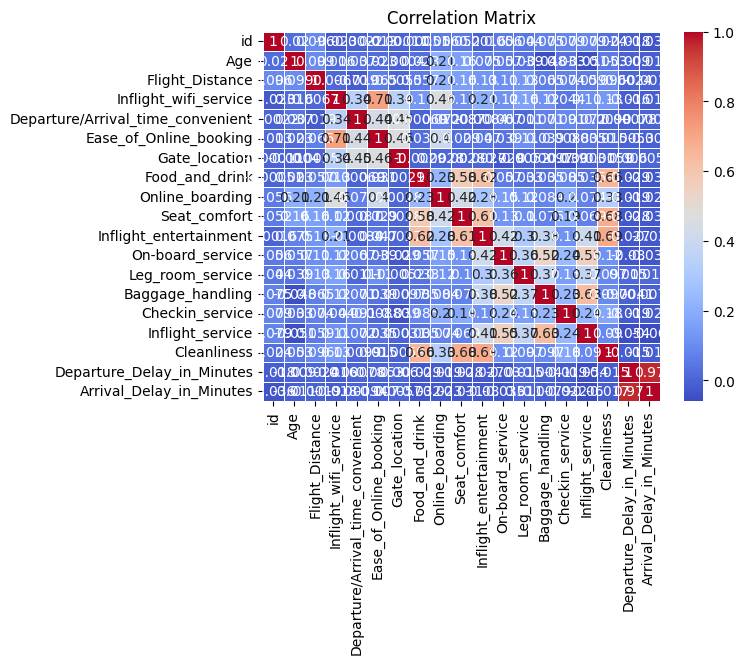

In [25]:
corr_matrix = Full_Set.corr(numeric_only=True)
# plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Well it certainly got better but we need to make some more adjustments to the parameters of the heatmap plots.

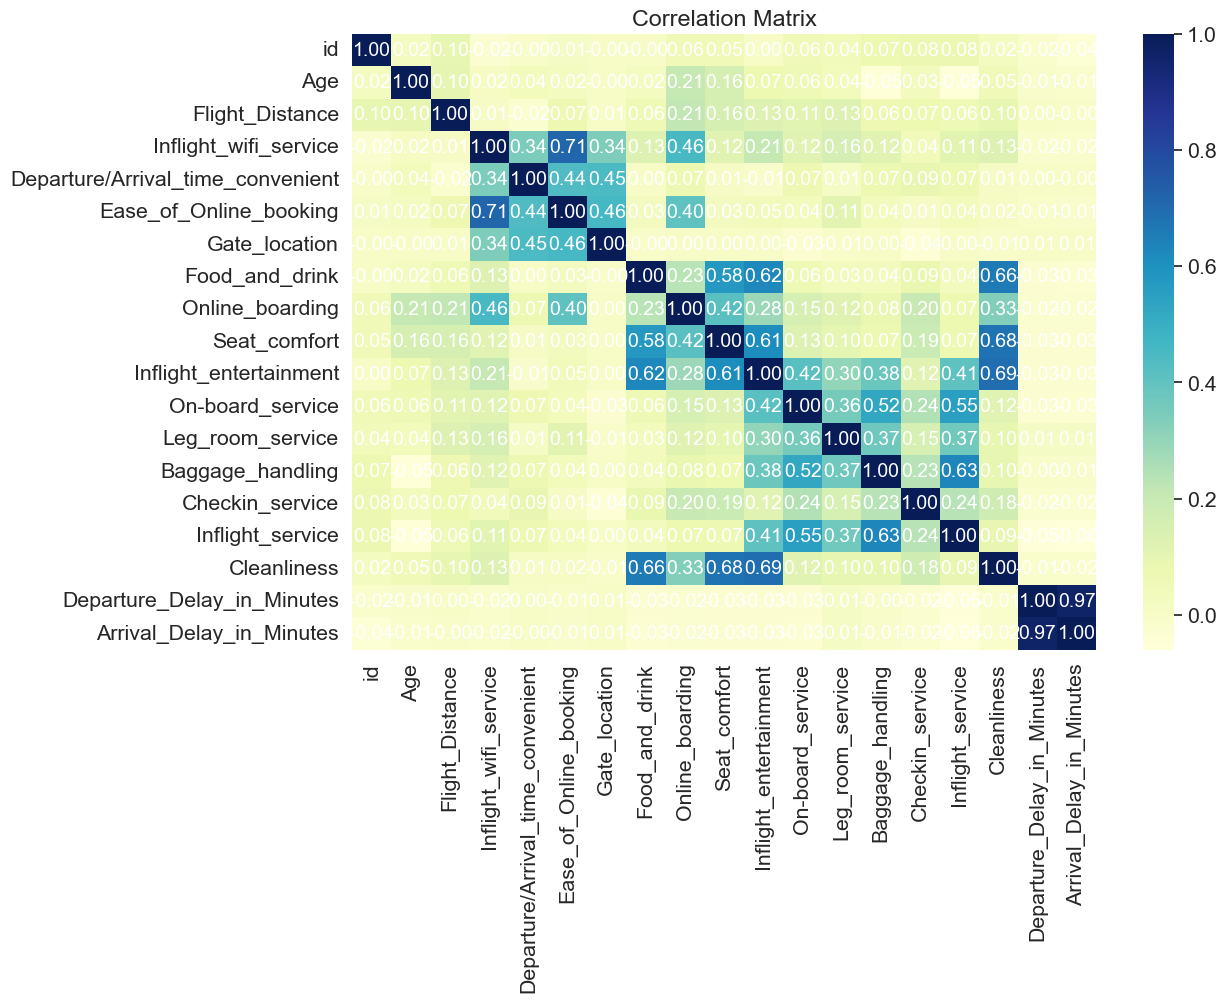

In [26]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.set_style("white")
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', annot_kws={"size": 14, "color": 'white'})
plt.title('Correlation Matrix')
plt.show()

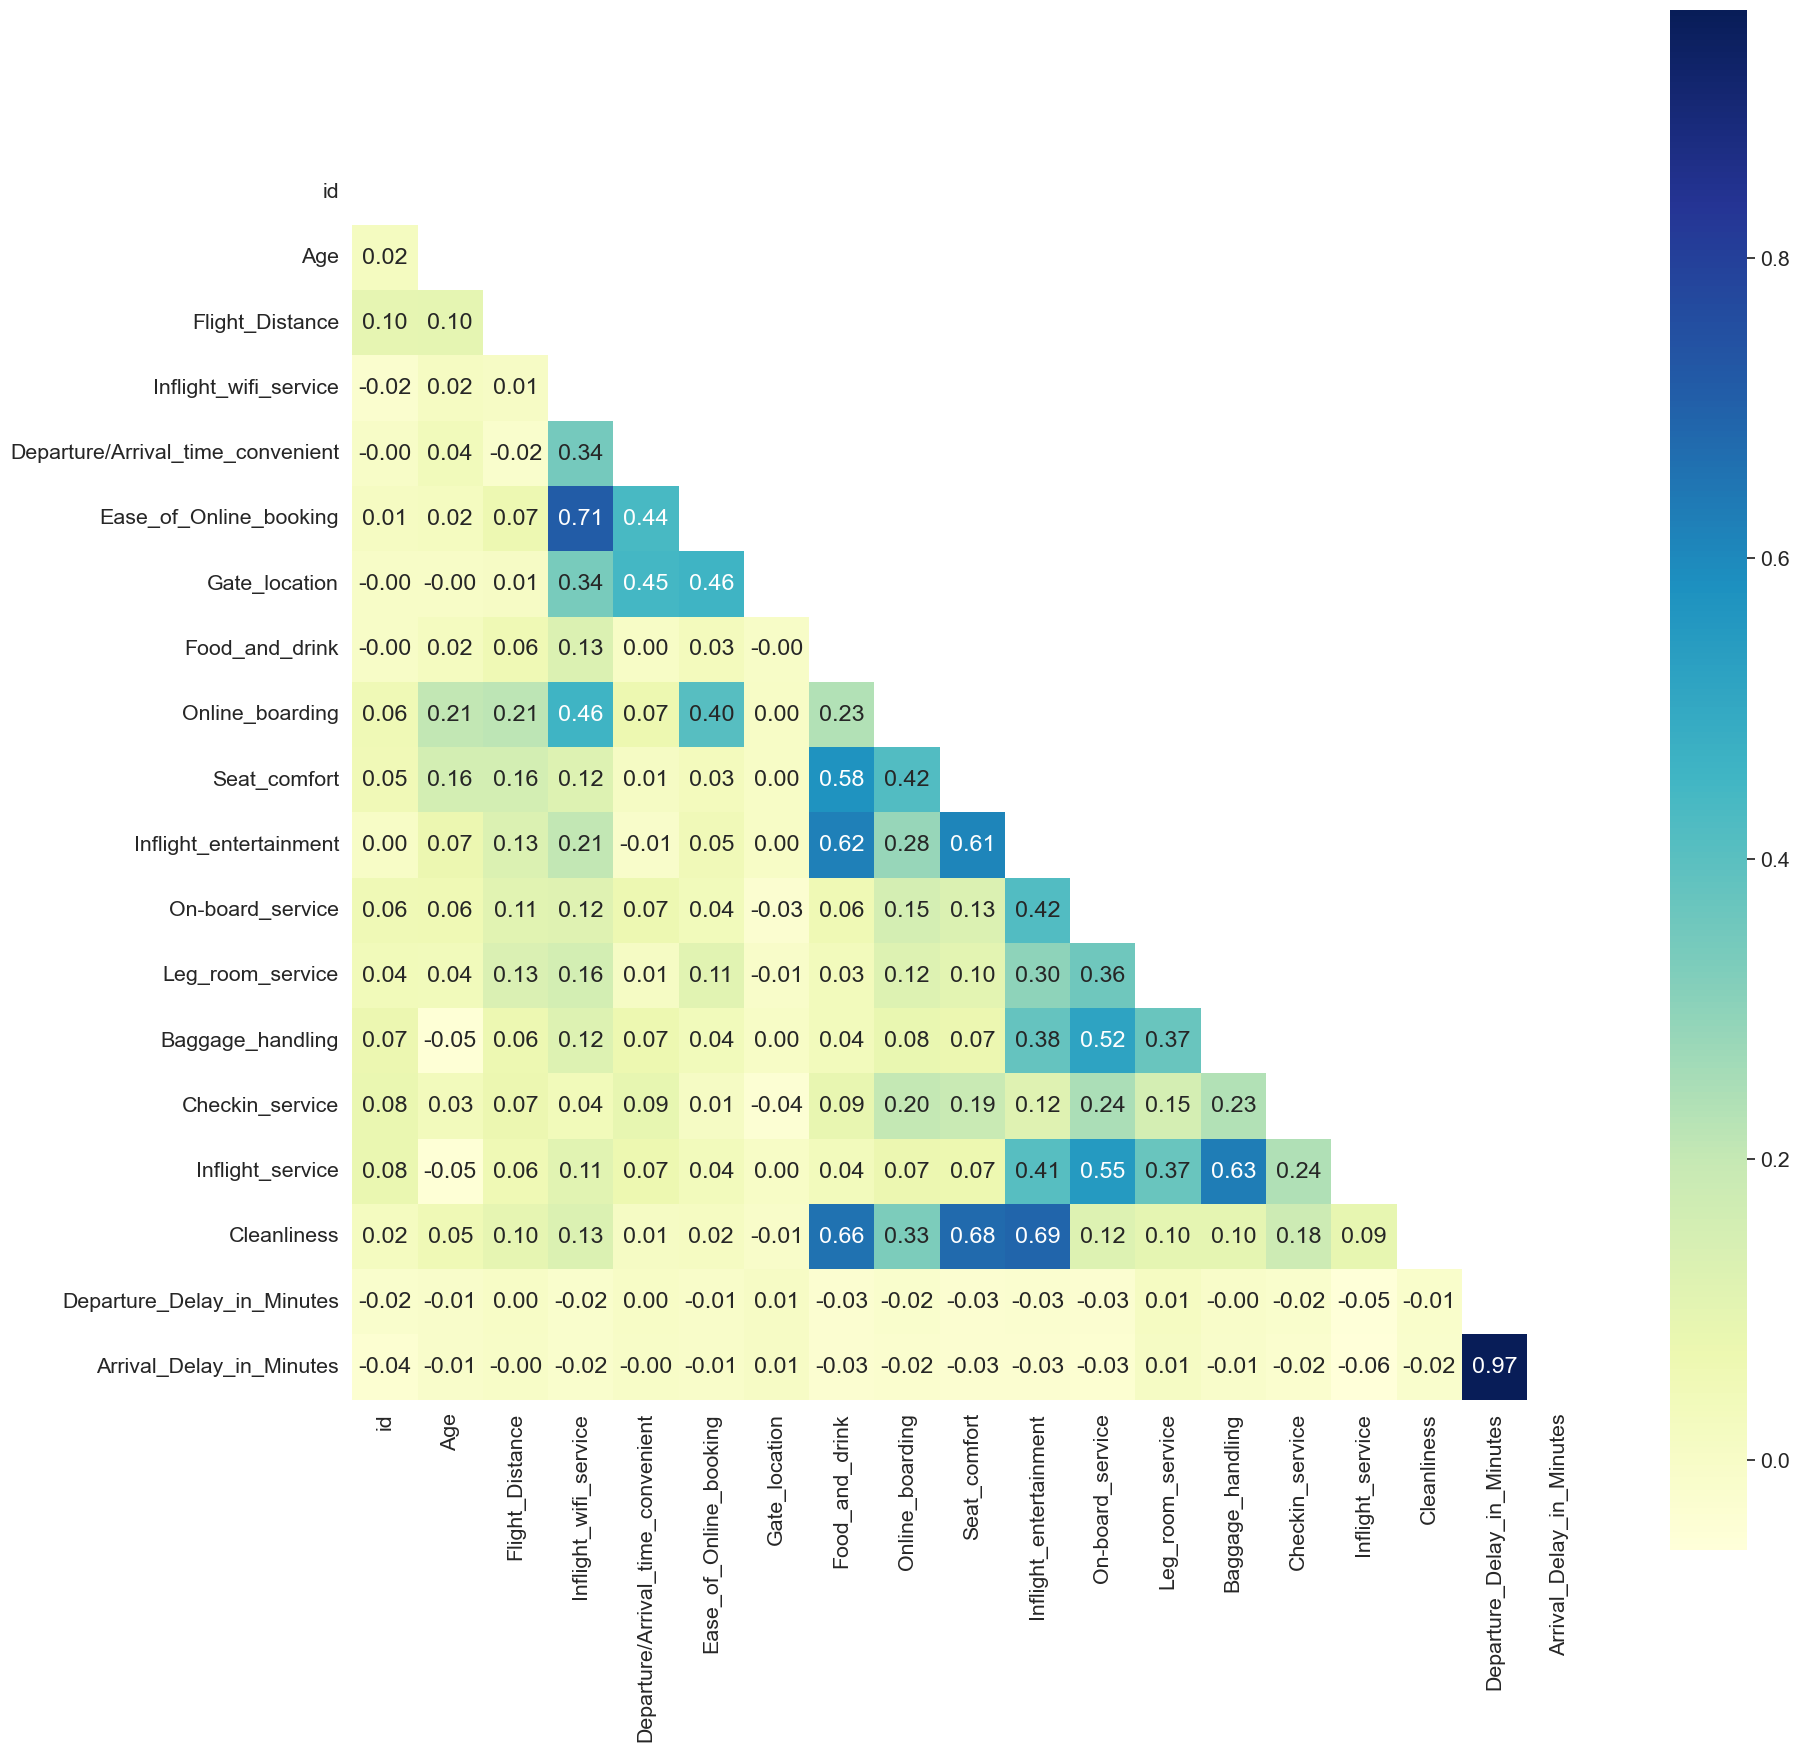

In [27]:
# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with masked upper triangle
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f", mask=mask, square=True)
plt.show()

Inflight_wifi_service is very correlated with Ease_of_Online_booking. The ratings for Cleanliness are also correlated to the ratings of Food_and_drink, Seat_Comfort, and Inflight_entertainment. But the two features that are highly correlated are the Departure_Delay_in_Minutes and the Arrival_Delay_in_Minutes, which is very obvious, logically speaking.

### Let's filter down to 4 numerical features instead....

In [28]:
cols = ['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']
filtered_numerical_data = Full_Set[cols]
filtered_numerical_data

Age  Flight_Distance  Departure_Delay_in_Minutes  \
0        13              460                          25   
1        25              235                           1   
2        26             1142                           0   
3        25              562                          11   
4        61              214                           0   
...     ...              ...                         ...   
129875   34              526                           0   
129876   23              646                           0   
129877   17              828                           0   
129878   14             1127                           0   
129879   42              264                           0   

        Arrival_Delay_in_Minutes  
0                           18.0  
1                            6.0  
2                            0.0  
3                            9.0  
4                            0.0  
...                          ...  
129875                       0.0  
129876                       0.0  
129877                       0.0  
129878                       0.0  
129879                       0.0  

[129880 rows x 4 columns]

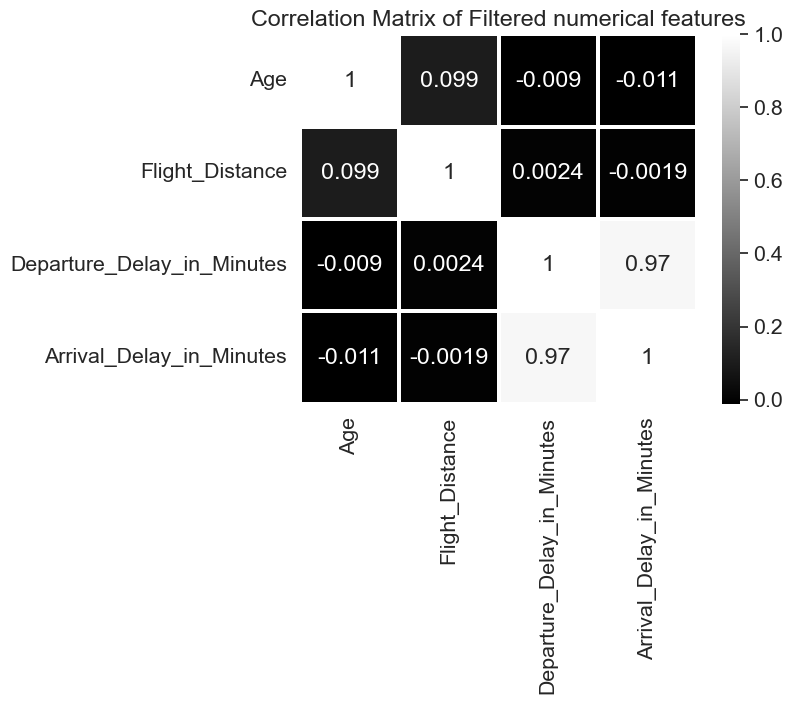

In [29]:
corr_matrix_1 = filtered_numerical_data.corr()

# plot the heatmap
sns.heatmap(corr_matrix_1, annot=True, cmap='gray', linewidths=1.6)
plt.title('Correlation Matrix of Filtered numerical features')
plt.show()

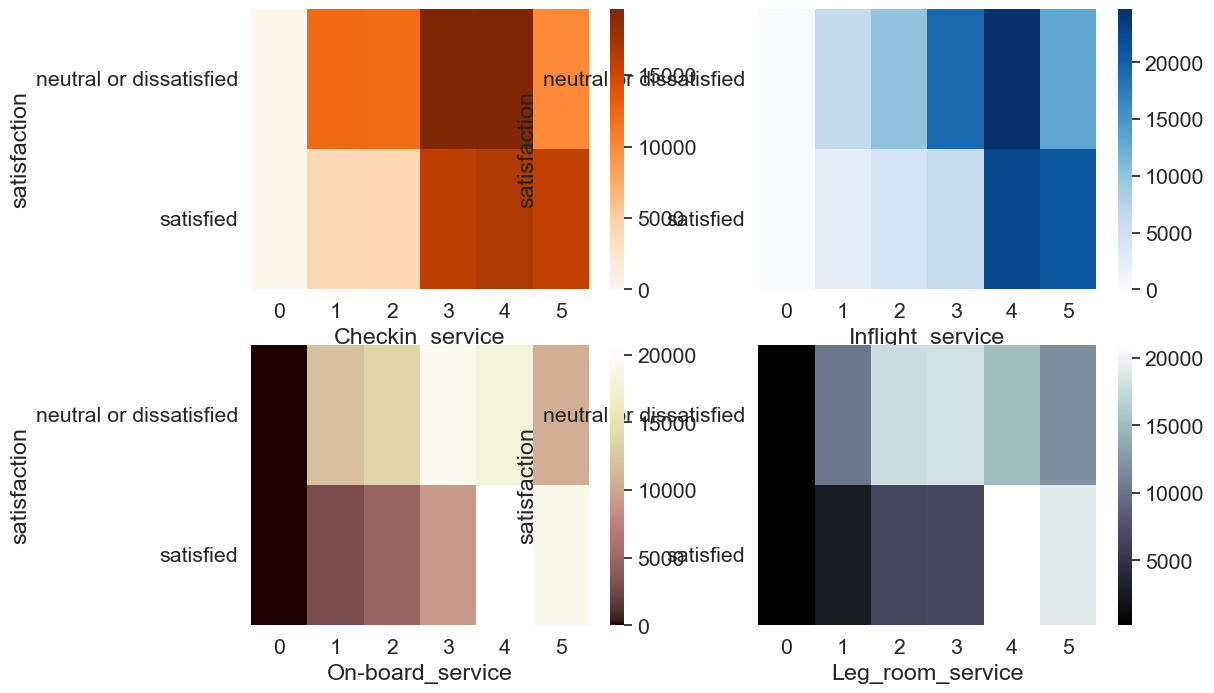

In [30]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(Full_Set['satisfaction'], Full_Set['Checkin_service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(Full_Set['satisfaction'], Full_Set['Inflight_service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(Full_Set['satisfaction'], Full_Set['On-board_service'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(Full_Set['satisfaction'], Full_Set['Leg_room_service'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])
plt.show()

*Checkin Service, Inflight Service, On-board Service, Leg-room Service*:  
For checkin service, 0-2 rating givers are predominantly dissatisfied. For other three services, only 4 and 5 rating givers belong to satisfied passengers category.

## Pairplot 

In [ ]:
def pairplot(data):
    sns.pairplot(data, hue = 'satisfaction', palette="flare")
    plt.show()
    
pairplot(Full_Set)

# Taking too long...........need more optimization

## Explaination: 

As we can see that the points lined up more or less along a straight line going from the lower left corner to the upper right. Thus, in some approximation the dependence of the arrival time delay on the departure time delay is linear.

The results obtained are quite logical and can be explained as follows. If the flight of the airline's customers was delayed by a certain amount of time at departure, then the flight will be delayed by about the same amount of time at landing (provided that the aircraft does not accelerate in flight to make up for lost time).

## Boxplot

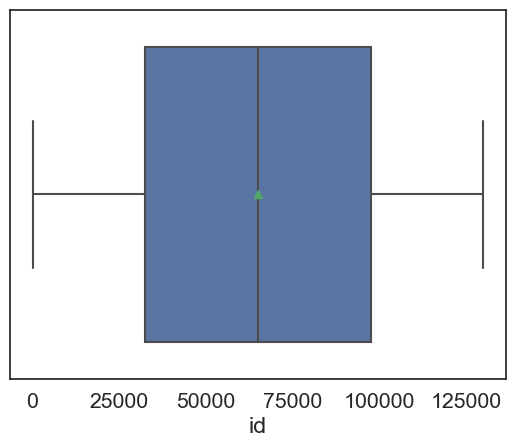

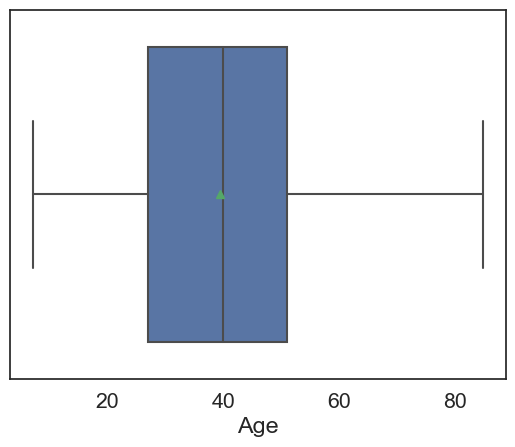

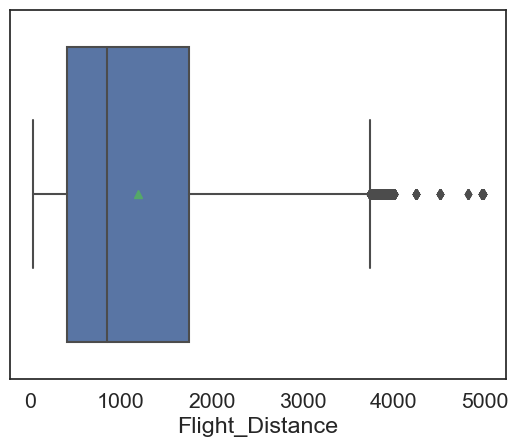

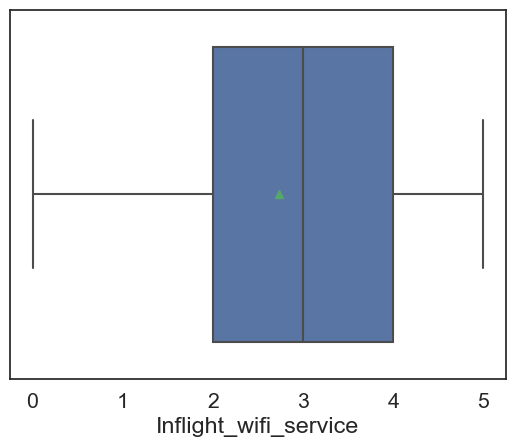

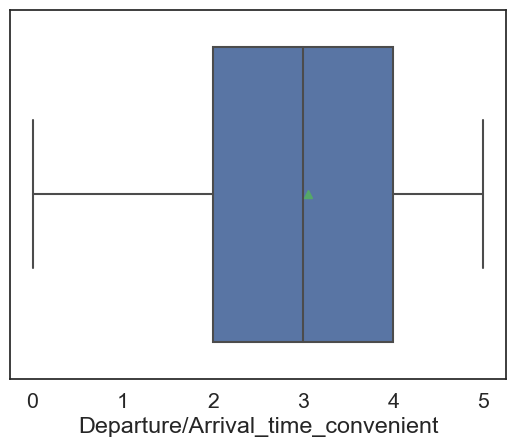

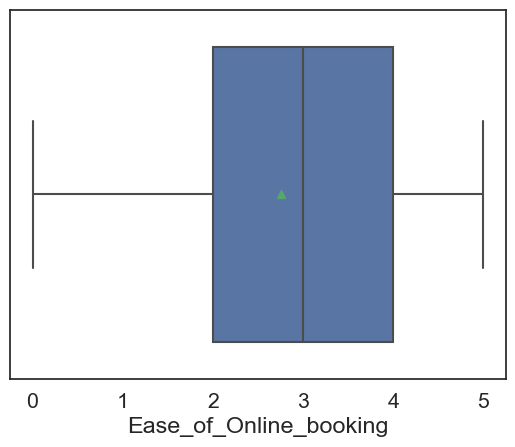

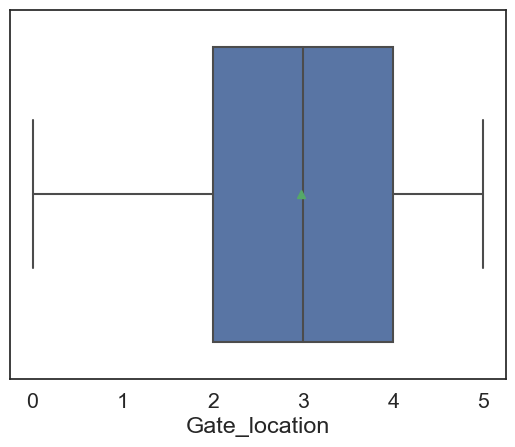

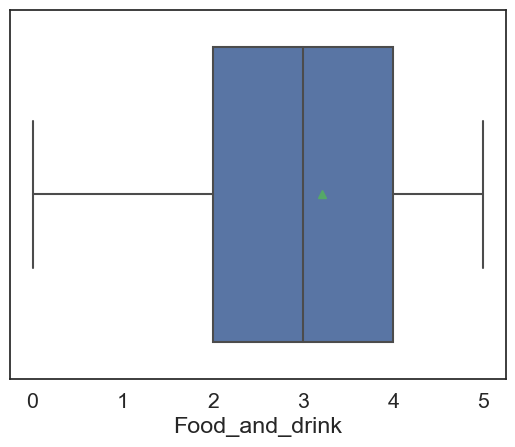

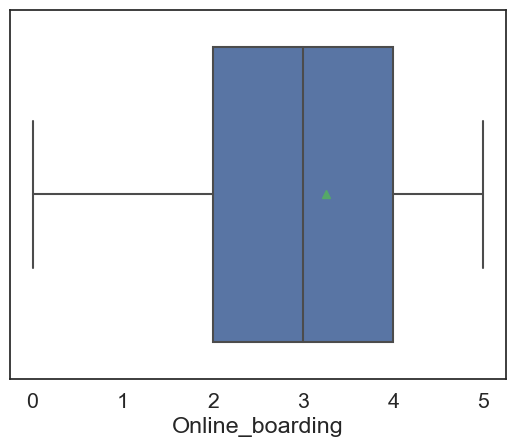

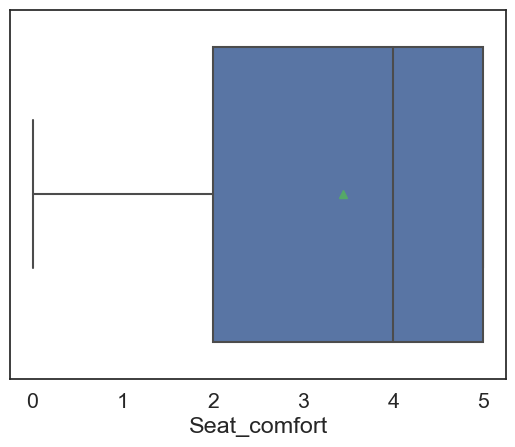

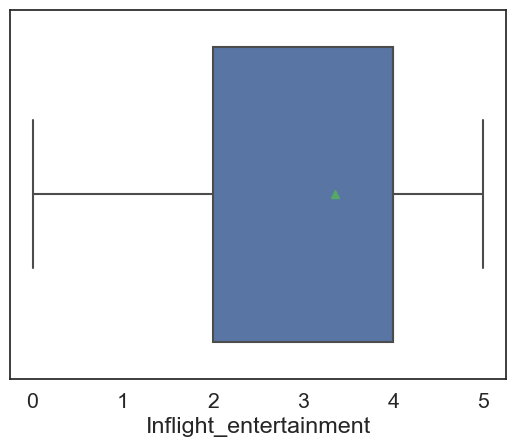

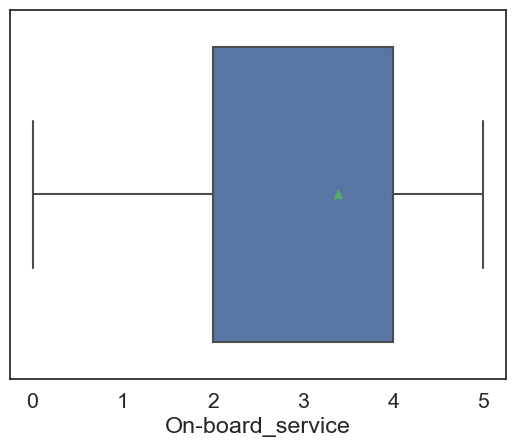

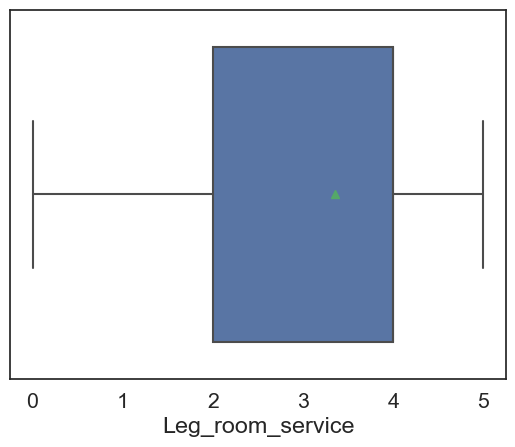

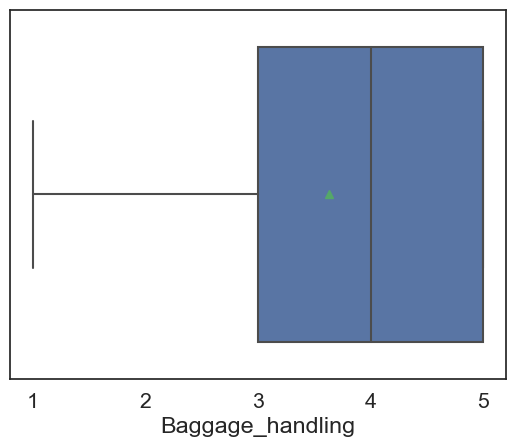

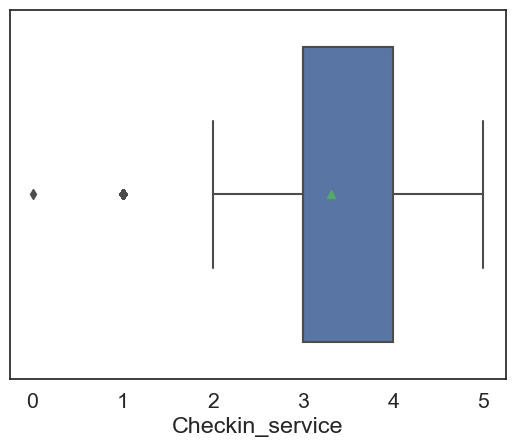

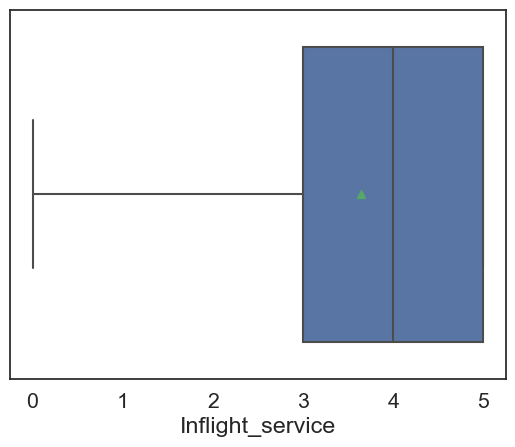

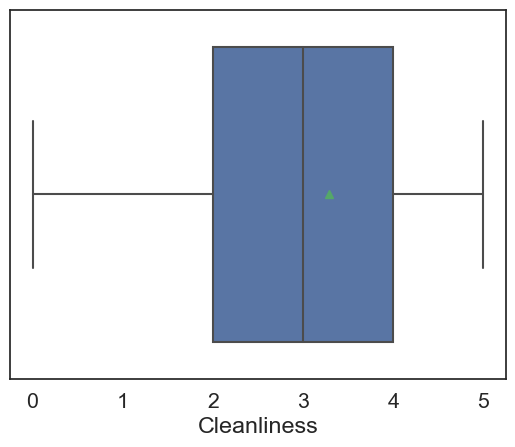

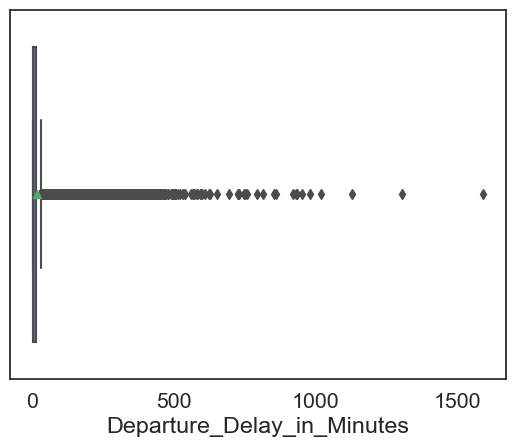

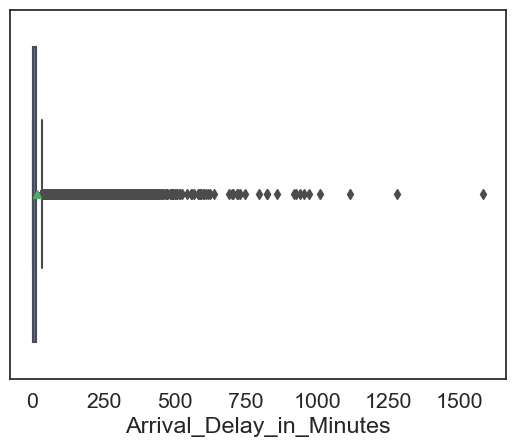

In [32]:
def plot_boxplot(data, feature):
        sns.boxplot(x = data[feature], showmeans = True, data = data)
        plt.show()

numerical_features = Full_Set.select_dtypes(include=['int64', 'float64'])

#features = ['Flight_Distance', 'Departure_Delay_in_Minutes'  , 'Arrival_Delay_in_Minutes'] # numerical features
for feature in numerical_features:
    plot_boxplot(Full_Set, feature)

## Explaination: 

As we can see from those boxplots above, there are many outliers occured in some of our numerical features 

# Pie Chart

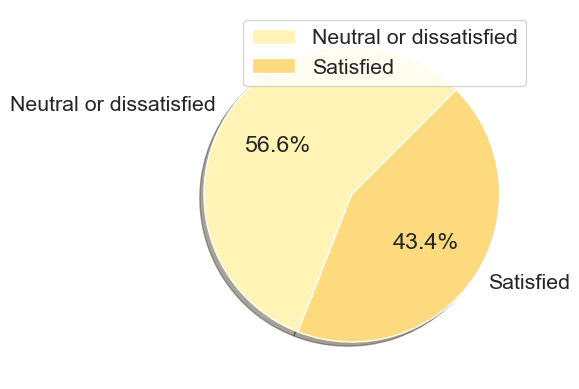

In [36]:
plt.pie(Full_Set.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], \
        colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%', shadow = True,  startangle = 45)
plt.legend(loc = 'best')
plt.show()

### Explaination:
As we can see from the pie chart above, it shows that the target variable of our data is **more or less balanced.**

# The Ratio of categorical feature(univariate analysis) or Ordinal Analysis

In [38]:
Full_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer_Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight_Distance                    129880 non-null  int64  
 7   Inflight_wifi_service              129880 non-null  int64  
 8   Departure/Arrival_time_convenient  129880 non-null  int64  
 9   Ease_of_Online_booking             129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Food_and_drink                     1298

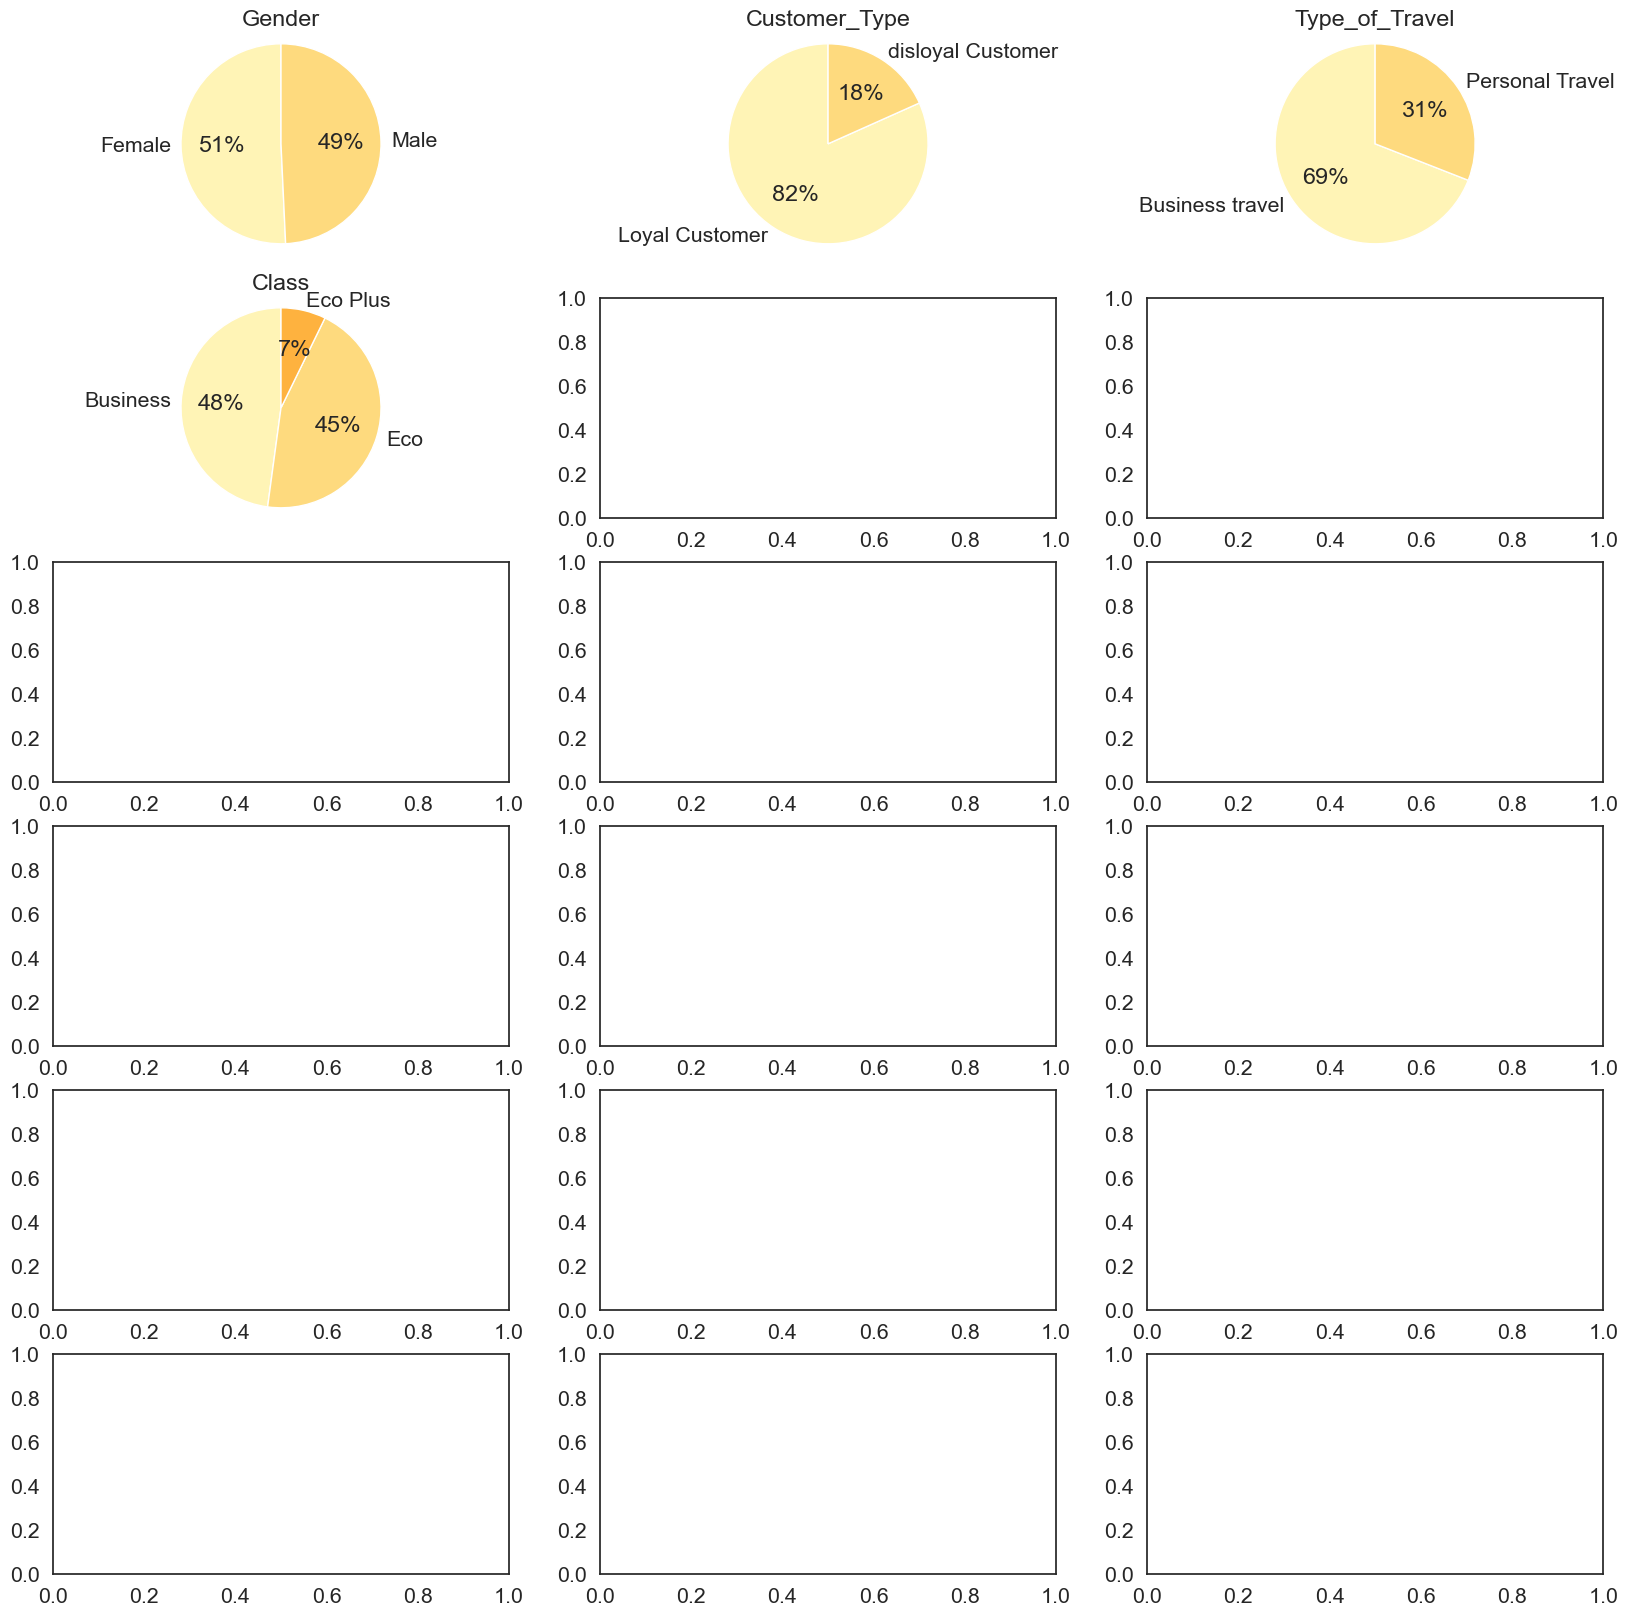

In [39]:
categorical_data = [1, 2,4,5]


categ = Full_Set.iloc[:, categorical_data]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = Full_Set[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i // 3, i % 3].pie(sizes, labels = labels, colors = sns.color_palette("YlOrBr"), autopct = '%1.0f%%', startangle = 90)
    axes[i // 3, i % 3].axis('equal')
    axes[i // 3, i % 3].set_title(col)
plt.show()

In [40]:
Full_Set.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

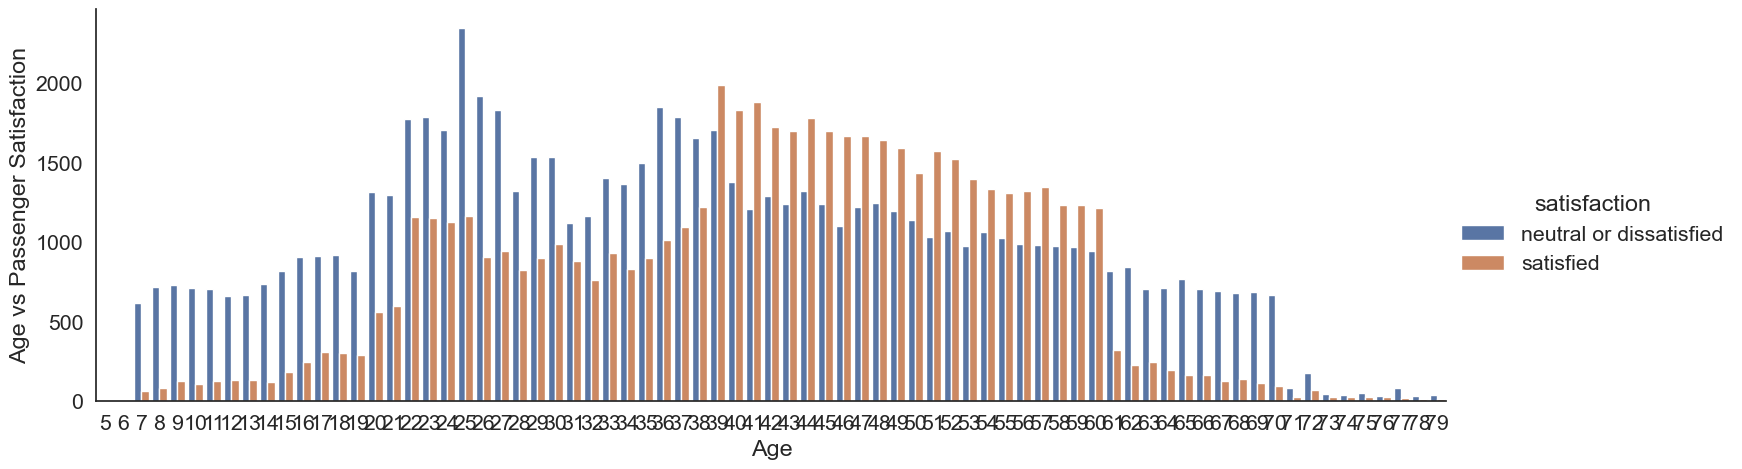

In [41]:
with sns.axes_style('white'):
    g = sns.catplot(x="Age", data=Full_Set, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')


*Age:* From age 7-to-38 and from age 61-to-79, quotient of dissatisfied passengers is very high compared to satisfied passengers. On the contrary, in age range 39-60, quotient of satisfied passengers is higher compared to dissatisfied passengers.

# Bar Graph

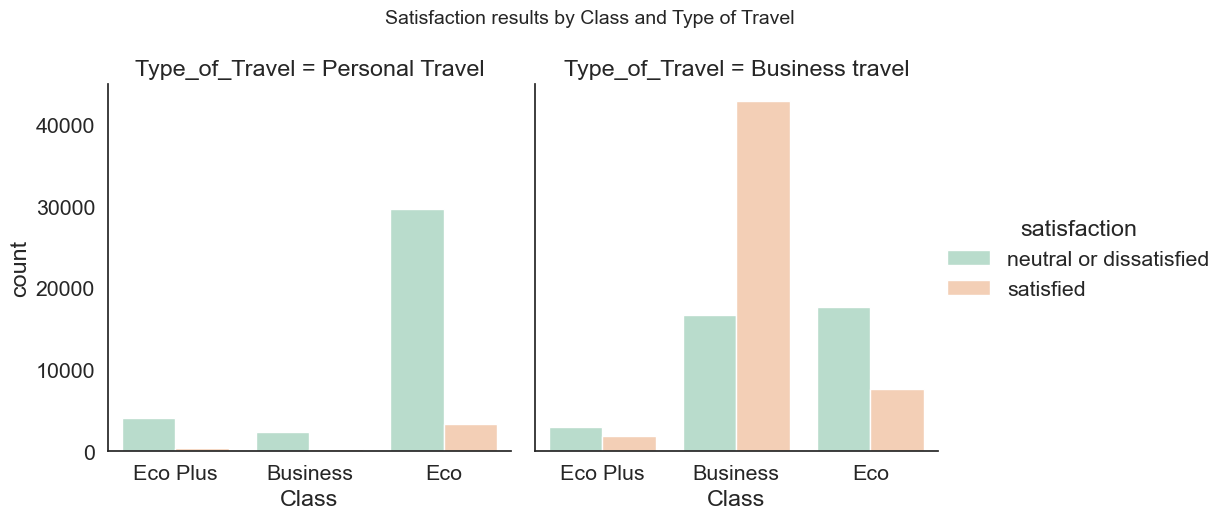

In [42]:
sns.catplot(x='Class', hue ="satisfaction", kind = "count", col = "Type_of_Travel", 
            data = Full_Set ,palette ="Pastel2", height = 5)
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
plt.show()

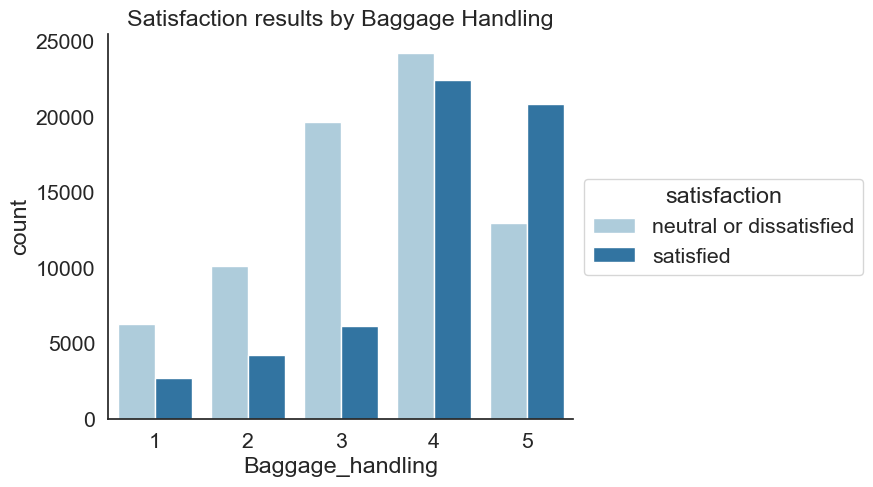

In [43]:
plt.figure(figsize = (6,5))
sns.countplot(x ="Baggage_handling", data = Full_Set, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Baggage Handling")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

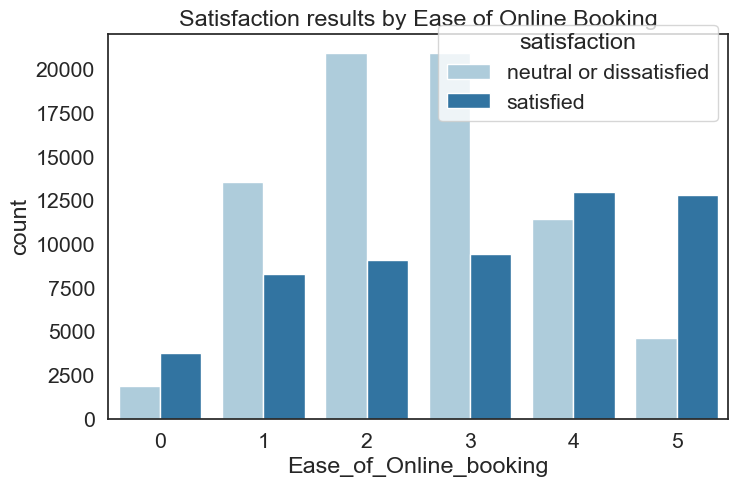

In [44]:
plt.figure(figsize = (8,5))
sns.countplot(x ="Ease_of_Online_booking", data = Full_Set, hue ="satisfaction",palette ="Paired" )

plt.title("Satisfaction results by Ease of Online Booking")
plt.legend(loc = 'center right', bbox_to_anchor=(1, 0.9),  title = "satisfaction")

plt.show()

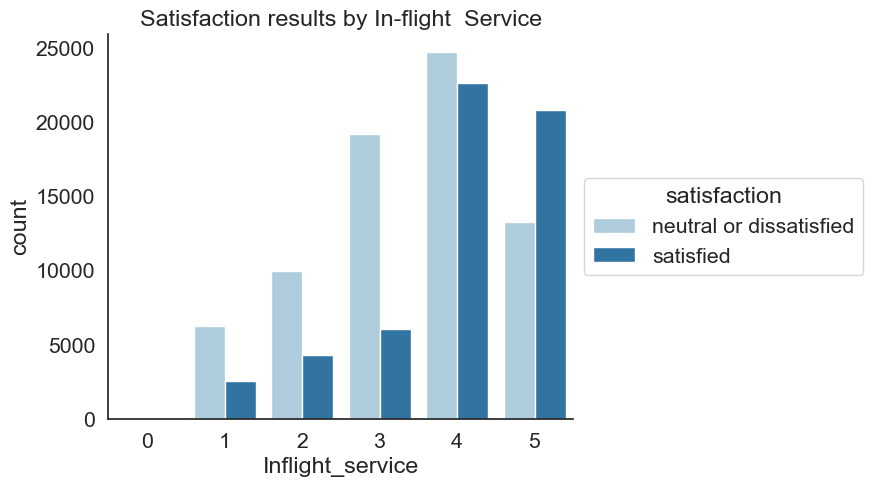

In [45]:
plt.figure(figsize = (6,5))
sns.countplot(x ="Inflight_service", data = Full_Set, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by In-flight  Service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction") 

plt.show()

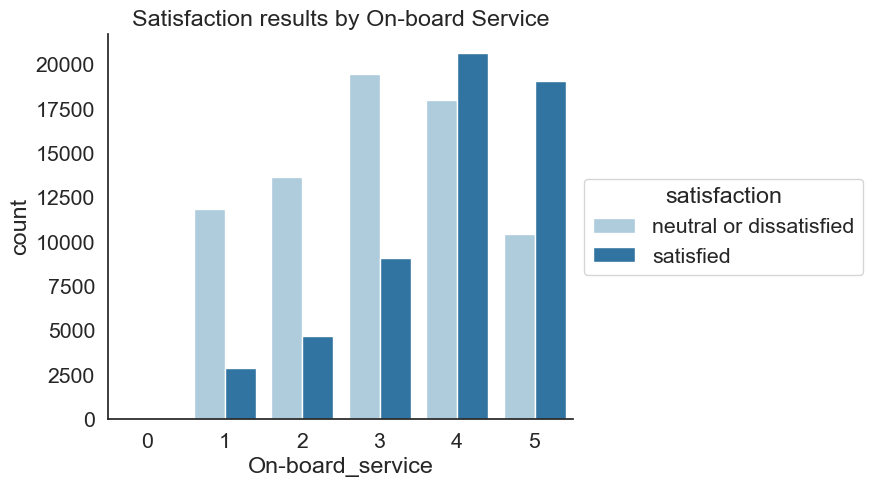

In [46]:
plt.figure(figsize = (6,5))
sns.countplot(x ="On-board_service", data = Full_Set, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by On-board Service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction") 

plt.show()

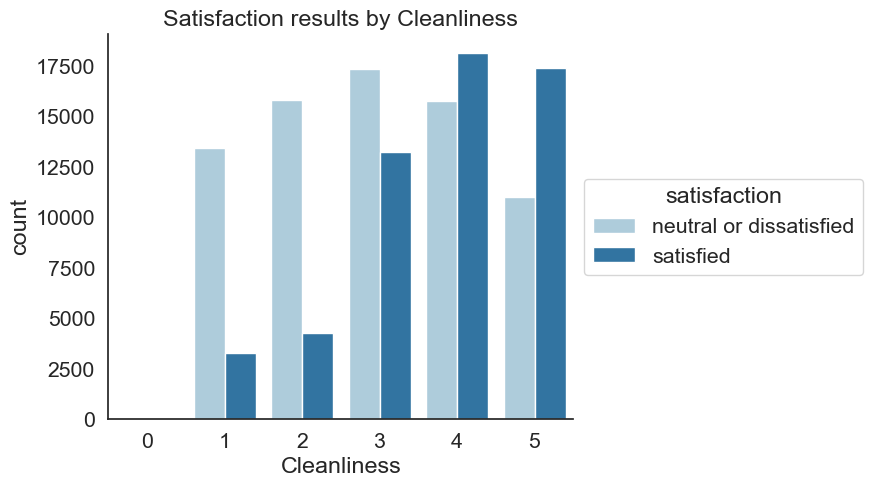

In [47]:
plt.figure(figsize = (6,5))
sns.countplot(x ="Cleanliness", data = Full_Set, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Cleanliness")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "satisfaction") 

plt.show()

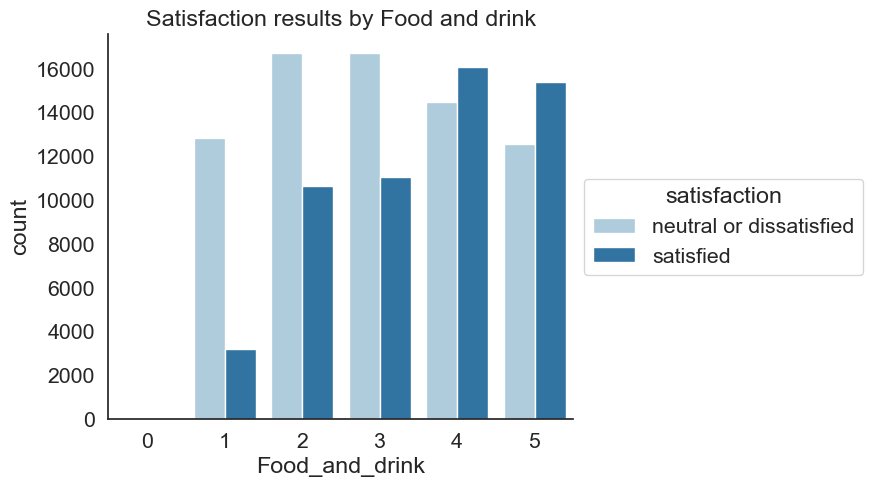

In [48]:
plt.figure(figsize = (6,5))
sns.countplot(x ="Food_and_drink", data = Full_Set, hue ="satisfaction", palette ="Paired" )
plt.title("Satisfaction results by Food and drink")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "satisfaction") 

plt.show()

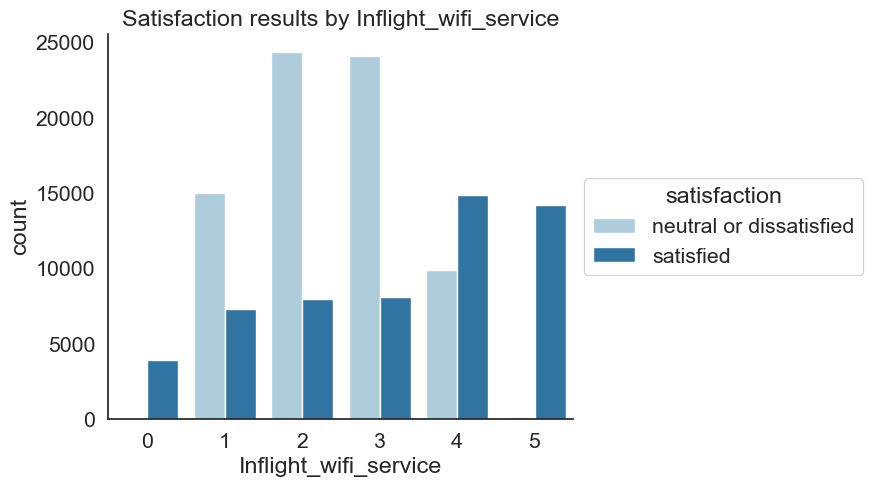

In [52]:
plt.figure(figsize = (6,5))
sns.countplot(x ="Inflight_wifi_service", data = Full_Set, hue ="satisfaction", palette ="Paired" )
plt.title("Satisfaction results by Inflight_wifi_service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "satisfaction") 

plt.show()

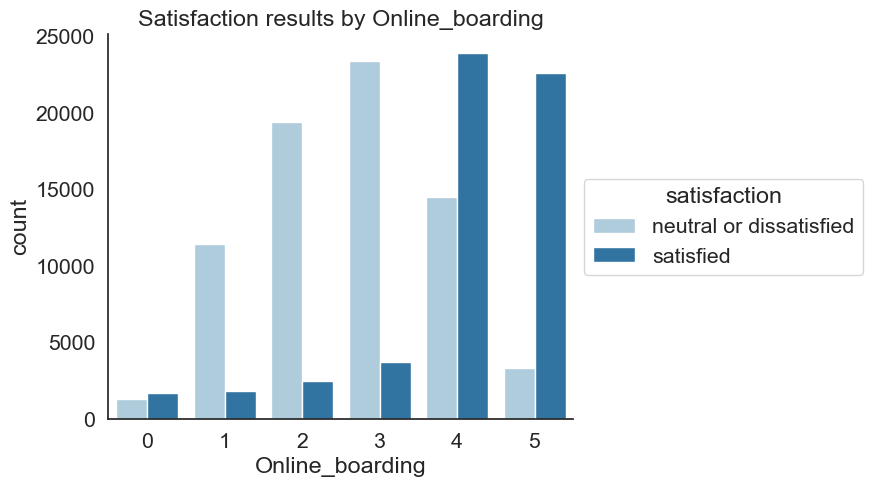

In [51]:
plt.figure(figsize = (6,5))
sns.countplot(x ="Online_boarding", data = Full_Set, hue ="satisfaction", palette ="Paired" )
plt.title("Satisfaction results by Online_boarding")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "satisfaction") 

plt.show()

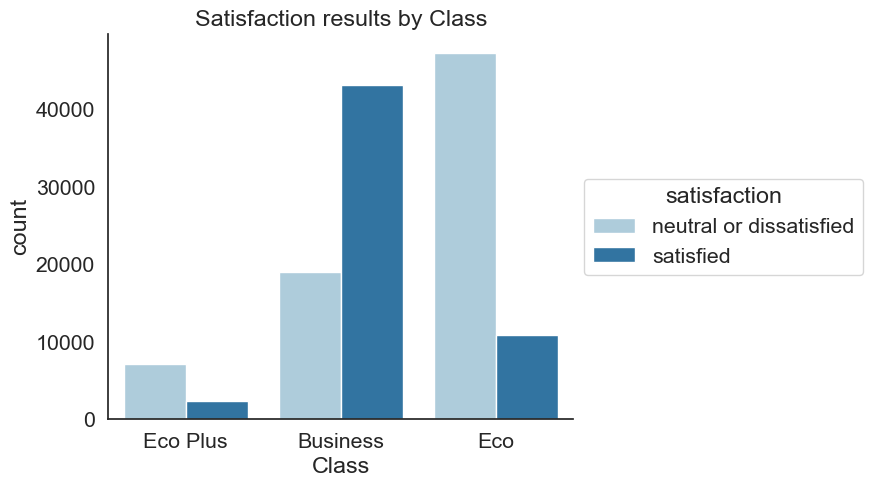

In [53]:
plt.figure(figsize = (6,5))
sns.countplot(x ="Class", data = Full_Set, hue ="satisfaction", palette ="Paired" )
plt.title("Satisfaction results by Class")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "satisfaction") 

plt.show()

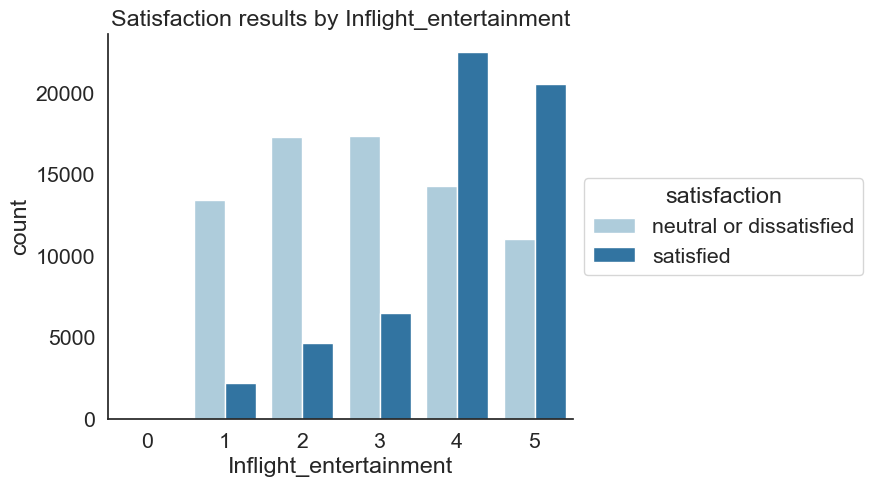

In [54]:
plt.figure(figsize = (6,5))
sns.countplot(x ="Inflight_entertainment", data = Full_Set, hue ="satisfaction", palette ="Paired" )
plt.title("Satisfaction results by Inflight_entertainment")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "satisfaction") 

plt.show()   

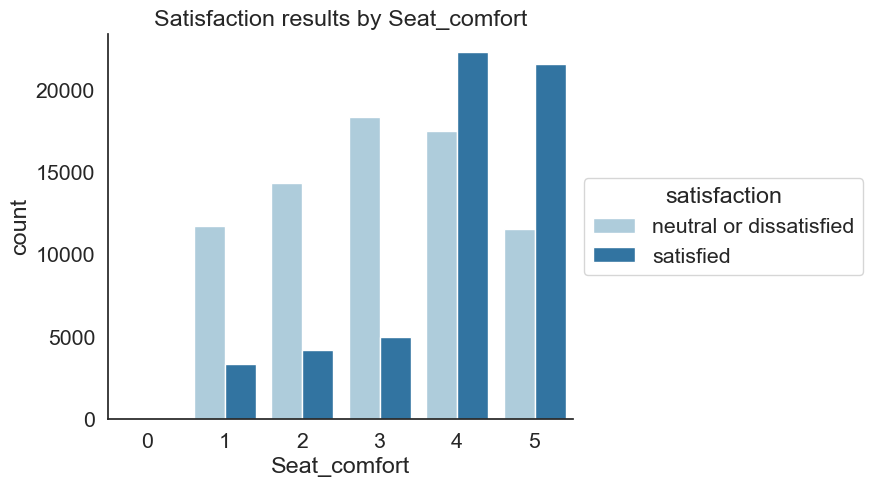

In [55]:
plt.figure(figsize = (6,5))
sns.countplot(x ="Seat_comfort", data = Full_Set, hue ="satisfaction", palette ="Paired" )
plt.title("Satisfaction results by Seat_comfort")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "satisfaction") 
plt.show()   

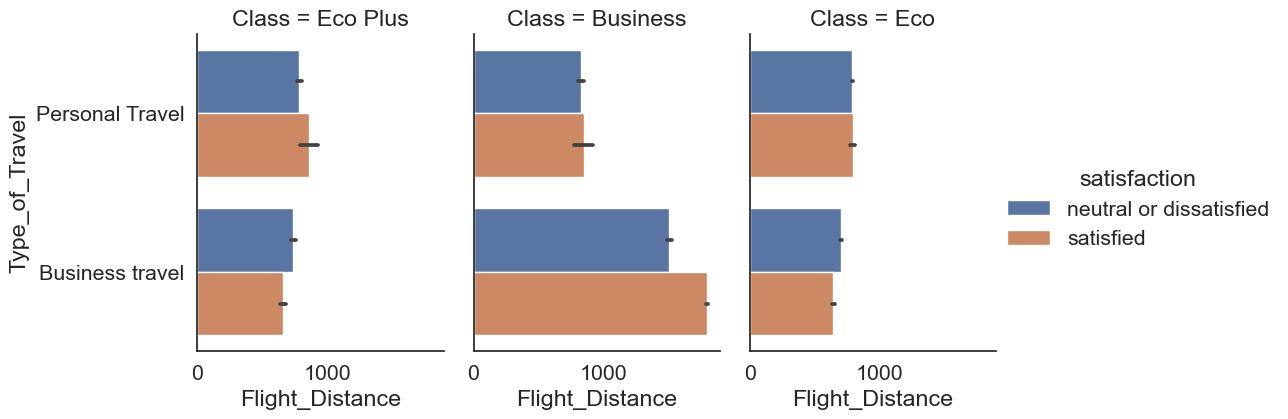

In [49]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=Full_Set, kind="bar", height=4.5, aspect=.8)

*Type of Travel, Class, Flight Distance*: For business travel in business class category, the number of satisfied passengers are quite on the higher side for longer flight distance. For other combinations, there is almost equal distribution of satisfied and dissatisfied passengers.

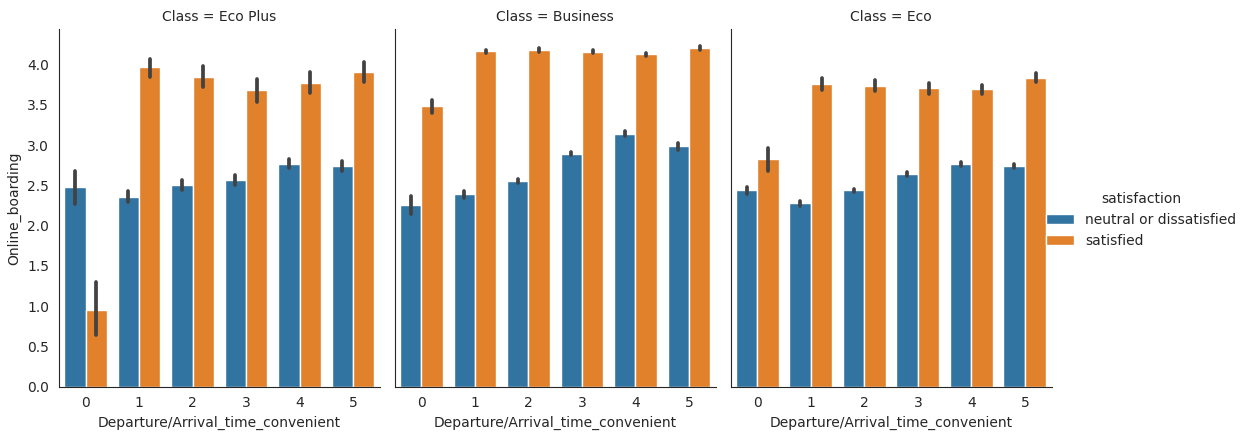

In [20]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=Full_Set, kind="bar", height=4.5, aspect=.8)

*Online Boarding, Departure/Arrival Time Convenience grouped by Class:* For Eco Plus class, very inconvenient Departure/Arrival time (Departure/Arrival_time_convenient = 0) has really high no. of dissatisfied passengers, even when online boarding is done very well. For other combinations, no. of satisfied passengers are on the higher side compared to no. of dissatisfied passengers.

In [ ]:
data_test_lr.isnull().sum()

# Checking for percentages of missing values inside each feature

In [25]:
data_with_nan = [features for features in Full_Set.columns if Full_Set[features].isnull().sum]
for feature in data_with_nan:
    print(feature, np.round(Full_Set[feature].isnull().mean(), 4), '% missing values')

id 0.0 % missing values
Gender 0.0 % missing values
Customer_Type 0.0 % missing values
Age 0.0 % missing values
Type_of_Travel 0.0 % missing values
Class 0.0 % missing values
Flight_Distance 0.0 % missing values
Inflight_wifi_service 0.0 % missing values
Departure/Arrival_time_convenient 0.0 % missing values
Ease_of_Online_booking 0.0 % missing values
Gate_location 0.0 % missing values
Food_and_drink 0.0 % missing values
Online_boarding 0.0 % missing values
Seat_comfort 0.0 % missing values
Inflight_entertainment 0.0 % missing values
On-board_service 0.0 % missing values
Leg_room_service 0.0 % missing values
Baggage_handling 0.0 % missing values
Checkin_service 0.0 % missing values
Inflight_service 0.0 % missing values
Cleanliness 0.0 % missing values
Departure_Delay_in_Minutes 0.0 % missing values
Arrival_Delay_in_Minutes 0.003 % missing values
satisfaction 0.0 % missing values


# Fill missing value with mean value

In [58]:
data = Full_Set.fillna({'Arrival_Delay_in_Minutes' : np.min(Full_Set['Arrival_Delay_in_Minutes'])})
for feature in data_with_nan:
    print(feature, np.round(data[feature].isnull().mean(), 4), '% missing values')

id 0.0 % missing values
Gender 0.0 % missing values
Customer_Type 0.0 % missing values
Age 0.0 % missing values
Type_of_Travel 0.0 % missing values
Class 0.0 % missing values
Flight_Distance 0.0 % missing values
Inflight_wifi_service 0.0 % missing values
Departure/Arrival_time_convenient 0.0 % missing values
Ease_of_Online_booking 0.0 % missing values
Gate_location 0.0 % missing values
Food_and_drink 0.0 % missing values
Online_boarding 0.0 % missing values
Seat_comfort 0.0 % missing values
Inflight_entertainment 0.0 % missing values
On-board_service 0.0 % missing values
Leg_room_service 0.0 % missing values
Baggage_handling 0.0 % missing values
Checkin_service 0.0 % missing values
Inflight_service 0.0 % missing values
Cleanliness 0.0 % missing values
Departure_Delay_in_Minutes 0.0 % missing values
Arrival_Delay_in_Minutes 0.0 % missing values
satisfaction 0.0 % missing values


# Checking for outliers

In [59]:
def detect_outlier(data_set):
    outlier_lst = []
    q1 = data_set.quantile(0.25)
    q3 = data_set.quantile(0.75)
    
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    upper_outliers_index = data_set[data_set > upper_bound].index.tolist()
    lower_outliers_index = data_set[data_set < lower_bound].index.tolist()
    
#     upper_outliers = data_set[data_set > upper_bound].tolist()
#     lower_outliers = data_set[data_set < lower_bound]
    
    print(f'Outliers Index: ', upper_outliers_index)
    
print(detect_outlier(data['Flight_Distance']))

Outliers Index:  [80, 173, 201, 215, 379, 388, 421, 446, 458, 473, 483, 569, 634, 717, 778, 794, 799, 869, 879, 939, 978, 994, 1061, 1068, 1092, 1101, 1114, 1120, 1186, 1236, 1248, 1252, 1269, 1417, 1425, 1496, 1541, 1548, 1587, 1705, 1752, 1846, 1847, 1876, 1932, 1948, 2156, 2194, 2208, 2213, 2286, 2297, 2363, 2392, 2401, 2495, 2544, 2556, 2619, 2628, 2659, 2736, 2803, 2818, 2847, 2970, 2981, 3027, 3030, 3046, 3090, 3129, 3186, 3282, 3379, 3401, 3405, 3407, 3485, 3486, 3516, 3525, 3660, 3773, 3838, 3866, 3912, 3927, 4003, 4013, 4031, 4071, 4073, 4114, 4134, 4362, 4363, 4539, 4545, 4593, 4676, 4725, 4762, 4794, 4832, 4849, 4930, 4935, 4939, 4941, 5170, 5216, 5276, 5342, 5370, 5381, 5383, 5409, 5466, 5504, 5554, 5583, 5639, 5650, 5703, 5732, 5733, 5743, 5750, 5758, 5779, 5781, 5866, 5903, 5985, 6058, 6135, 6159, 6259, 6328, 6348, 6489, 6506, 6535, 6617, 6753, 6776, 6778, 6812, 6846, 6882, 6959, 6967, 7104, 7106, 7120, 7138, 7150, 7206, 7306, 7326, 7346, 7351, 7355, 7393, 7496, 7648, 768

# **Second presentation starts here**

## <u><font color='turquoise'>**Performing Satistical/Logistic regression Analysis**</font></u>

# Identify your model
Here are the general steps for logistic regression analysis:

Split your dataset into a training set and a test set.

Encode your categorical variables using one-hot encoding or label encoding.

Scale your continuous variables using standardization or normalization.

Fit a logistic regression model to your training data using a suitable optimization algorithm, such as gradient descent.

Evaluate the performance of your logistic regression model on the test set using metrics such as accuracy, precision, recall, and F1-score.

Interpret the coefficients of your logistic regression model to understand the relationship between your independent variables and the dependent variable.


# Analyze the assumptions for a linear regression model:

<li>Linearity</li>
<li>Independence</li>
<li>Normality</li>
<li>Homoscedasticity</li>
<li>Multicollinearity</li>

#### Let's try to use the linear model as our first model and we'll see what happens...


<h5>But first, we need to encode the reponse variable(of catergorical type) into a numerical type by the following codes:</h5>
<ol><font color='green'><b>satisfied := 1</n></font></ol>
<ol><font color='green'><b>dissatisfied or neautral := 0</b></font></ol>


**If not you will get the following error when trying to fit a linear model for an obvious reason.**

In [60]:

model = smf.ols(formula='satisfaction ~ Departure_Delay_in_Minutes + Arrival_Delay_in_Minutes', data=data).fit()
print(model.summary())

ValueError: endog has evaluated to an array with multiple columns that has shape (129880, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).


<h4>But for precaution, we will create a copy of our original data frame called 'data_test_lr' then test the linear regression model on the copy instead called 'data_test_lr'</h4>

In [61]:
data_test_lr = data.copy()

In [62]:
data_test_lr.to_csv('output1.csv', header=True)

In [63]:
data_test_lr

id  Gender      Customer_Type  Age   Type_of_Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
129875   78463    Male  disloyal Customer   34  Business travel  Business   
129876   71167    Male     Loyal Customer   23  Business travel  Business   
129877   37675  Female     Loyal Customer   17  Personal Travel       Eco   
129878   90086    Male     Loyal Customer   14  Business travel  Business   
129879   34799  Female     Loyal Customer   42  Personal Travel       Eco   

        Flight_Distance  Inflight_wifi_service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
129875              526                      3   
129876              646                      4   
129877              828                      2   
129878             1127                      3   
129879              264                      2   

        Departure/Arrival_time_convenient  Ease_of_Online_booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
129875                                  3                       3  ...   
129876                                  4                       4  ...   
129877                                  5                       1  ...   
129878                                  3                       3  ...   
129879                                  5                       2  ...   

        Inflight_entertainment  On-board_service  Leg_room_service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
129875                       4                 3                 2   
129876                       4                 4                 5   
129877                       2                 4                 3   
129878                       4                 3                 2   
129879                       1                 1                 2   

        Baggage_handling  Checkin_service  Inflight_service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
129875                 4                4                 5            4   
129876                 5                5                 5            4   
129877                 4                5                 4            2

**Then we shall convert the 'satisfaction' column to a binary variable (0 or 1)**

In [64]:
data_test_lr['satisfaction'] = data_test_lr['satisfaction'].replace({'neutral or dissatisfied':0, 'satisfied':1})
data_test_lr

id  Gender      Customer_Type  Age   Type_of_Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
129875   78463    Male  disloyal Customer   34  Business travel  Business   
129876   71167    Male     Loyal Customer   23  Business travel  Business   
129877   37675  Female     Loyal Customer   17  Personal Travel       Eco   
129878   90086    Male     Loyal Customer   14  Business travel  Business   
129879   34799  Female     Loyal Customer   42  Personal Travel       Eco   

        Flight_Distance  Inflight_wifi_service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
129875              526                      3   
129876              646                      4   
129877              828                      2   
129878             1127                      3   
129879              264                      2   

        Departure/Arrival_time_convenient  Ease_of_Online_booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
129875                                  3                       3  ...   
129876                                  4                       4  ...   
129877                                  5                       1  ...   
129878                                  3                       3  ...   
129879                                  5                       2  ...   

        Inflight_entertainment  On-board_service  Leg_room_service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
129875                       4                 3                 2   
129876                       4                 4                 5   
129877                       2                 4                 3   
129878                       4                 3                 2   
129879                       1                 1                 2   

        Baggage_handling  Checkin_service  Inflight_service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
129875                 4                4                 5            4   
129876                 5                5                 5            4   
129877                 4                5                 4            2

### Plot 

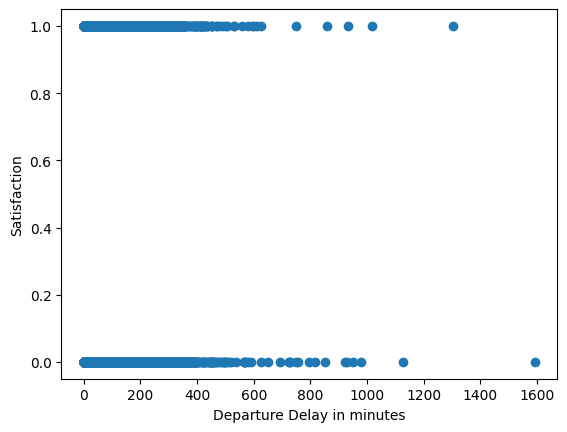

In [32]:
plt.scatter(data_test_lr['Departure_Delay_in_Minutes'], data_test_lr['satisfaction'])
plt.xlabel('Departure Delay in minutes')
plt.ylabel('Satisfaction')
plt.show()


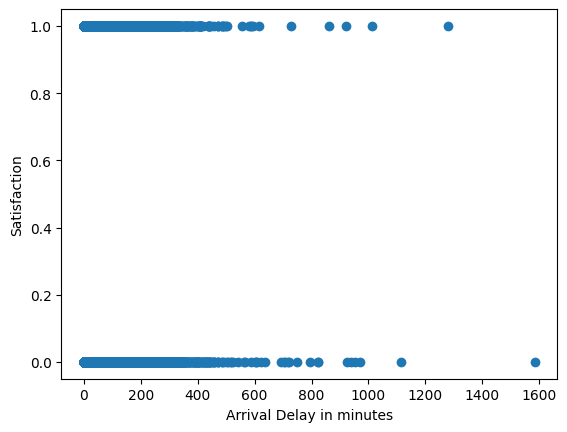

In [33]:
plt.scatter(data_test_lr['Arrival_Delay_in_Minutes'], data_test_lr['satisfaction'])
plt.xlabel('Arrival Delay in minutes')
plt.ylabel('Satisfaction')
plt.show()

In [65]:
import statsmodels.formula.api as smf

In [66]:
# convert the "satisfaction" column to a numeric data type
data_test_lr["satisfaction"] = pd.to_numeric(data_test_lr["satisfaction"], errors="coerce")


# fit the model
model = smf.ols(formula='satisfaction ~ Departure_Delay_in_Minutes + Arrival_Delay_in_Minutes', data=data_test_lr).fit()

# print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     241.2
Date:                Sat, 20 May 2023   Prob (F-statistic):          2.79e-105
Time:                        17:20:37   Log-Likelihood:                -92900.
No. Observations:              129880   AIC:                         1.858e+05
Df Residuals:                  129877   BIC:                         1.858e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [67]:
# fit the model
model_1 = smf.ols(formula='satisfaction ~ Arrival_Delay_in_Minutes', data=data_test_lr).fit()

# print the summary
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     440.6
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.17e-97
Time:                        17:20:38   Log-Likelihood:                -92920.
No. Observations:              129880   AIC:                         1.858e+05
Df Residuals:                  129878   BIC:                         1.859e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [68]:
# fit the model
model_2 = smf.ols(formula='satisfaction ~ Departure_Delay_in_Minutes', data=data_test_lr).fit()

# print the summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     335.2
Date:                Sat, 20 May 2023   Prob (F-statistic):           8.63e-75
Time:                        17:20:40   Log-Likelihood:                -92973.
No. Observations:              129880   AIC:                         1.859e+05
Df Residuals:                  129878   BIC:                         1.860e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## <font color='gold'>**Check for multi-collinearity**</font>
<h5>
<font color='orange'>It should be noted that we already saw that the departure delay and arrival delay per minutes columns were shown to be very correlated by using a heat map.</font>. Although correlation analysis and visualization helpful for understanding the linear relationship between pairs of variables, they may not capture the full extent of multicollinearity in a regression model. <font color='yellow'><b>Multicollinearity refers to a situation where <u>two or more predictor variables</u> in a regression model are highly correlated with each other.</b></font>

To check for multicollinearity in a dataset using Python, you can use the variance inflation factor (VIF). The VIF measures the extent to which the variance (or standard error) of the estimated regression coefficient is increased due to collinearity among the predictor variables in a linear regression model. 
</h5>

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
data_test_lr.isnull().sum()

id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [71]:
X = data_test_lr[['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']]
X.loc[:, 'Intercept'] = 1
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\User\AppData\Local\Temp\ipykernel_25904\270355696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'Intercept'] = 1


In [72]:
X

Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  Intercept
0                               25                      18.0          1
1                                1                       6.0          1
2                                0                       0.0          1
3                               11                       9.0          1
4                                0                       0.0          1
...                            ...                       ...        ...
129875                           0                       0.0          1
129876                           0                       0.0          1
129877                           0                       0.0          1
129878                           0                       0.0          1
129879                           0                       0.0          1

[129880 rows x 3 columns]

In [73]:
vif

VIF Factor                    features
0   12.565103  Departure_Delay_in_Minutes
1   12.565103    Arrival_Delay_in_Minutes
2    1.154836                   Intercept

Here are some conclusions that can be drawn regarding multicollinearity between the variables 'Departure_Delay_in_Minutes' and 'Arrival_Delay_in_Minutes':

1. Both 'Departure_Delay_in_Minutes' and 'Arrival_Delay_in_Minutes' have relatively high VIF factors of approximately 12.565103. VIF values above 5 or 10 are often considered indicative of significant multicollinearity. In this case, the high VIF factors suggest a strong correlation between these two variables.

2. The 'Intercept' variable has a VIF factor of 1.154836, which is relatively low. A VIF factor close to 1 indicates no multicollinearity with other variables. This is expected since the intercept represents the constant term in the regression model and is not influenced by other predictors.

3. The high VIF factors for both 'Departure_Delay_in_Minutes' and 'Arrival_Delay_in_Minutes' suggest that these variables are highly correlated with each other. This multicollinearity can pose challenges in the interpretation of regression coefficients and affect the stability and reliability of the model.

4. When two variables are highly correlated, it becomes difficult to distinguish the individual effects of each variable on the target variable. In the presence of multicollinearity, changes in one variable may be associated with changes in the other, making it challenging to determine the independent impact of each predictor.

5. To address multicollinearity, you might consider one of the following options:
   - Removing one of the correlated variables ('Departure_Delay_in_Minutes' or 'Arrival_Delay_in_Minutes') if they are redundant or highly similar in terms of the information they provide.
   - Combining the correlated variables into a single composite variable or creating new derived variables that capture the shared information.
   - Collecting additional data or exploring alternative variables that are less correlated but still relevant to your analysis.

In summary, the high VIF factors for 'Departure_Delay_in_Minutes' and 'Arrival_Delay_in_Minutes' indicate the presence of multicollinearity. Further analysis and decision-making regarding variable selection or transformation are necessary to address multicollinearity and build a more stable and reliable regression model.

<h5>
When deciding which variable to remove to address multicollinearity, there are a few factors to consider:

1. Domain Knowledge: Consider the domain or subject matter knowledge related to the variables. Evaluate which variable is more meaningful and relevant to your analysis. Think about which variable has a stronger theoretical or practical basis in explaining the outcome variable or aligns better with your research question.

2. Statistical Significance: Assess the statistical significance of each variable individually. If one variable has a more significant impact on the outcome variable compared to the other, it may be a good candidate to retain in the model. You can examine the coefficients, p-values, and confidence intervals to determine the significance of each variable.

3. Data Quality: Consider the quality and reliability of the data for each variable. If one variable has more missing values, data inconsistencies, or data quality issues, it might be preferable to remove that variable.

4. Model Performance: Evaluate the impact of removing each variable on the overall model performance. Remove one variable at a time and assess the change in model fit, goodness-of-fit measures (such as R-squared), and predictive accuracy. Choose the variable that results in the least detrimental effect on the model's performance.

5. Interpretability: Consider the interpretability and ease of understanding the model results. Select the variable that provides clearer and more intuitive interpretations of the regression coefficients. This can help in communicating and explaining the findings to others effectively.

By considering these factors, you can make an informed decision about which variable to remove. Remember to re-evaluate the model after removing one variable to ensure it still meets your requirements and objectives.</h5>

<h1>Test for Normality using QQ-Plot</h1>

<u>**<h4>Recap on qq-plot and some of the intuition behind it.</h4>**</u>
<p>A QQ plot, short for quantile-quantile plot, is a graphical method for comparing a data distribution to a theoretical distribution. In a QQ plot, the quantiles of the two distributions are plotted against each other. If the data follows the theoretical distribution closely, the points on the plot will form a straight line. Deviations from the straight line indicate differences between the two distributions. A QQ plot can be used to visually assess whether the data follows a particular distribution, such as the normal distribution.</p>

In [74]:
arrival_delay = data_test_lr['Arrival_Delay_in_Minutes']
departure_delay = data_test_lr['Departure_Delay_in_Minutes']

In [76]:
import scipy.stats as stats

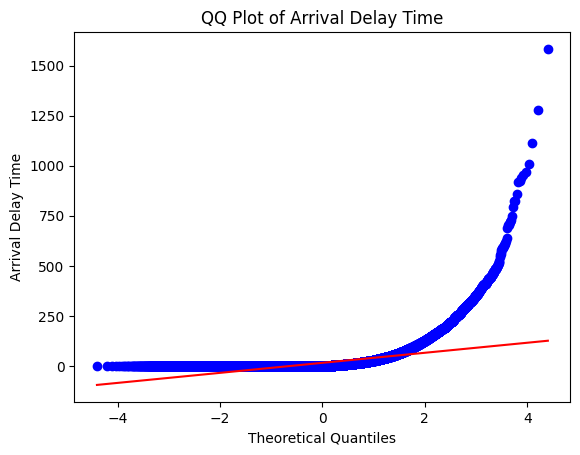

In [77]:
# Generate QQ plot for arrival delay time
stats.probplot(arrival_delay, dist="norm", plot=plt)
plt.title('QQ Plot of Arrival Delay Time')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Arrival Delay Time')
plt.show()

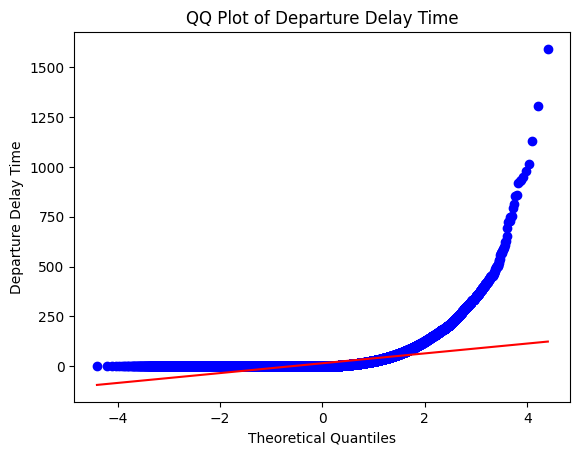

In [84]:
# Generate QQ plot for departure delay time
stats.probplot(departure_delay, dist="norm", plot=plt)
plt.title('QQ Plot of Departure Delay Time')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Departure Delay Time')
plt.show()

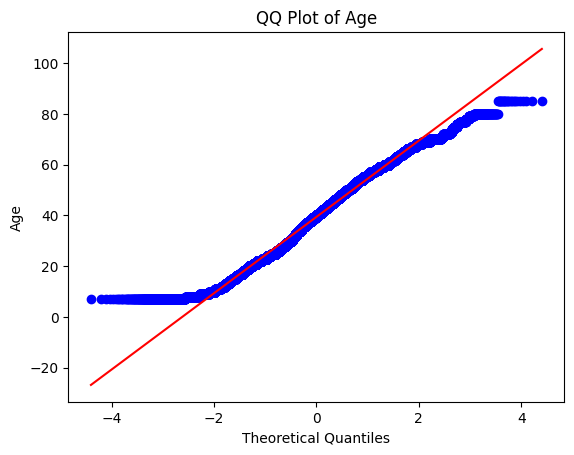

In [85]:
stats.probplot(data_test_lr['Age'], dist="norm", plot=plt)
plt.title('QQ Plot of Age')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Age')
plt.show()

 It's safe to say that the normality assumption has been broken.

### Linearity

We'll do that using a scatter plot

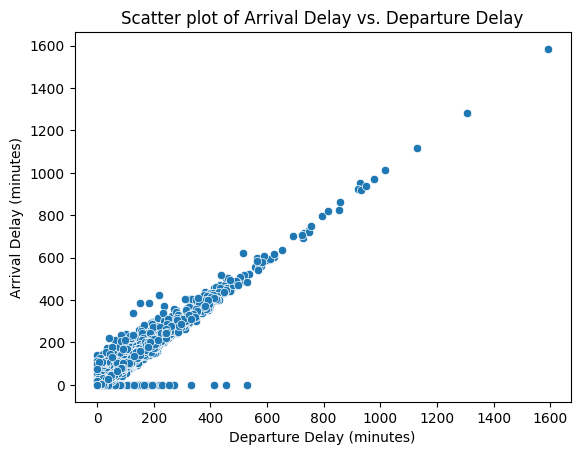

In [83]:
sns.scatterplot(x='Departure_Delay_in_Minutes', y='Arrival_Delay_in_Minutes', data=data_test_lr)

plt.title('Scatter plot of Arrival Delay vs. Departure Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

There seems to be a linear relationship between arrival delay and departure delay. We will have to remove one of them.We will have to consider other factors such as the correlation of each variable with the response variable (if you have one), potential confounding variables, and the overall fit and interpretability of your model. Additionally, you could also try including both variables in the model and see if they both contribute significantly to the model's predictive power.


___________________________________Still updating_____________________________________________

### Independence

In [88]:
data_test_lr.head()

id  Gender      Customer_Type  Age   Type_of_Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight_Distance  Inflight_wifi_service  Departure/Arrival_time_convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease_of_Online_booking  ...  Inflight_entertainment  On-board_service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg_room_service  Baggage_handling  Checkin_service  Inflight_service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

   satisfaction  
0             0  
1             0  
2             1  
3             0  
4             1  

[5 rows x 24 columns]

### Homoscedasticity

In [89]:
def plot_residuals(data):
    # Assuming the DataFrame has columns for predictors (X) and the target variable (y)
    X = data.drop(columns=['satisfaction'])
    y = data['satisfaction']
    
    # Fit the regression model
    model = smf.ols(formula='y ~ X', data=data).fit()
    
    # Calculate residuals
    residuals = model.resid
    
    # Plot residuals against predicted values
    plt.scatter(model.predict(), residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

In [90]:
plot_residuals(data_test_lr)

PatsyError: categorical data cannot be >1-dimensional

In [98]:
def plot_residuals_v2(data):
    # Assuming the DataFrame has columns for predictors (X) and the target variable (y)
    X = data.drop(columns=['satisfaction'])
    y = data['satisfaction']
    
    # Rename columns with spaces to underscores
    X.columns = [col.replace(' ', '_') for col in X.columns]
    
    # Fit the regression model
    formula = 'y ~ ' + ' + '.join(X.columns)
    model = smf.ols(formula=formula, data=data).fit()
    
    # Calculate residuals
    residuals = model.resid
    
    # Plot residuals against predicted values
    plt.scatter(model.predict(), residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

In [99]:
plot_residuals_v2(data_test_lr)

PatsyError: Error evaluating factor: NameError: name 'Departure' is not defined
    y ~ id + Gender + Customer_Type + Age + Type_of_Travel + Class + Flight_Distance + Inflight_wifi_service + Departure/Arrival_time_convenient + Ease_of_Online_booking + Gate_location + Food_and_drink + Online_boarding + Seat_comfort + Inflight_entertainment + On-board_service + Leg_room_service + Baggage_handling + Checkin_service + Inflight_service + Cleanliness + Departure_Delay_in_Minutes + Arrival_Delay_in_Minutes
                                                                                                               ^^^^^^^^^

In [100]:
df = pd.read_csv('output2.csv')
df.head()

Unnamed: 0  Unnamed:_0      id  Gender      Customer_Type  Age  \
0           0           0   70172    Male     Loyal Customer   13   
1           1           1    5047    Male  disloyal Customer   25   
2           2           2  110028  Female     Loyal Customer   26   
3           3           3   24026  Female     Loyal Customer   25   
4           4           4  119299    Male     Loyal Customer   61   

    Type_of_Travel     Class  Flight_Distance  Inflight_wifi_service  ...  \
0  Personal Travel  Eco Plus              460                      3  ...   
1  Business travel  Business              235                      3  ...   
2  Business travel  Business             1142                      2  ...   
3  Business travel  Business              562                      2  ...   
4  Business travel  Business              214                      3  ...   

   Inflight_entertainment  On-board_service  Leg_room_service  \
0                       5                 4                 3   
1                       1                 1                 5   
2                       5                 4                 3   
3                       2                 2                 5   
4                       3                 3                 4   

   Baggage_handling  Checkin_service  Inflight_service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
0                          25                      18.0   
1                           1                       6.0   
2                           0                       0.0   
3                          11                       9.0   
4                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 26 columns]

In [101]:
df.drop('Unnamed:_0', axis=1)

Unnamed: 0      id  Gender      Customer_Type  Age   Type_of_Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
129875      129875   78463    Male  disloyal Customer   34  Business travel   
129876      129876   71167    Male     Loyal Customer   23  Business travel   
129877      129877   37675  Female     Loyal Customer   17  Personal Travel   
129878      129878   90086    Male     Loyal Customer   14  Business travel   
129879      129879   34799  Female     Loyal Customer   42  Personal Travel   

           Class  Flight_Distance  Inflight_wifi_service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
129875  Business              526                      3   
129876  Business              646                      4   
129877       Eco              828                      2   
129878  Business             1127                      3   
129879       Eco              264                      2   

        Departure/Arrival_time_convenient  ...  Inflight_entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
129875                                  3  ...                       4   
129876                                  4  ...                       4   
129877                                  5  ...                       2   
129878                                  3  ...                       4   
129879                                  5  ...                       1   

        On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
129875                 3                 2                 4                4   
129876                 4                 5                 5                5   
129877                 4                 3                 4                5   
129878                 3                 2                 5                4   
129879                 1                 2                 1                1   

        Inflight_service  Cleanliness  Departure_Delay_in_Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

In [36]:
df.columns

Index(['Unnamed: 0', 'Unnamed:_0', 'id', 'Gender', 'Customer_Type', 'Age',
       'Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [102]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [40]:
df.head()

Unnamed:_0      id  Gender      Customer_Type  Age   Type_of_Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight_Distance  Inflight_wifi_service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival_time_convenient  ...  Inflight_entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight_service  Cleanliness  Departure_Delay_in_Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival_Delay_in_Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [103]:
df.drop('Unnamed:_0', axis=1, inplace=True)

In [104]:
df.head()

id  Gender      Customer_Type  Age   Type_of_Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight_Distance  Inflight_wifi_service  Departure/Arrival_time_convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease_of_Online_booking  ...  Inflight_entertainment  On-board_service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg_room_service  Baggage_handling  Checkin_service  Inflight_service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer_Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight_Distance                    129880 non-null  int64  
 7   Inflight_wifi_service              129880 non-null  int64  
 8   Departure/Arrival_time_convenient  129880 non-null  int64  
 9   Ease_of_Online_booking             129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Food_and_drink                     1298

<AxesSubplot: >

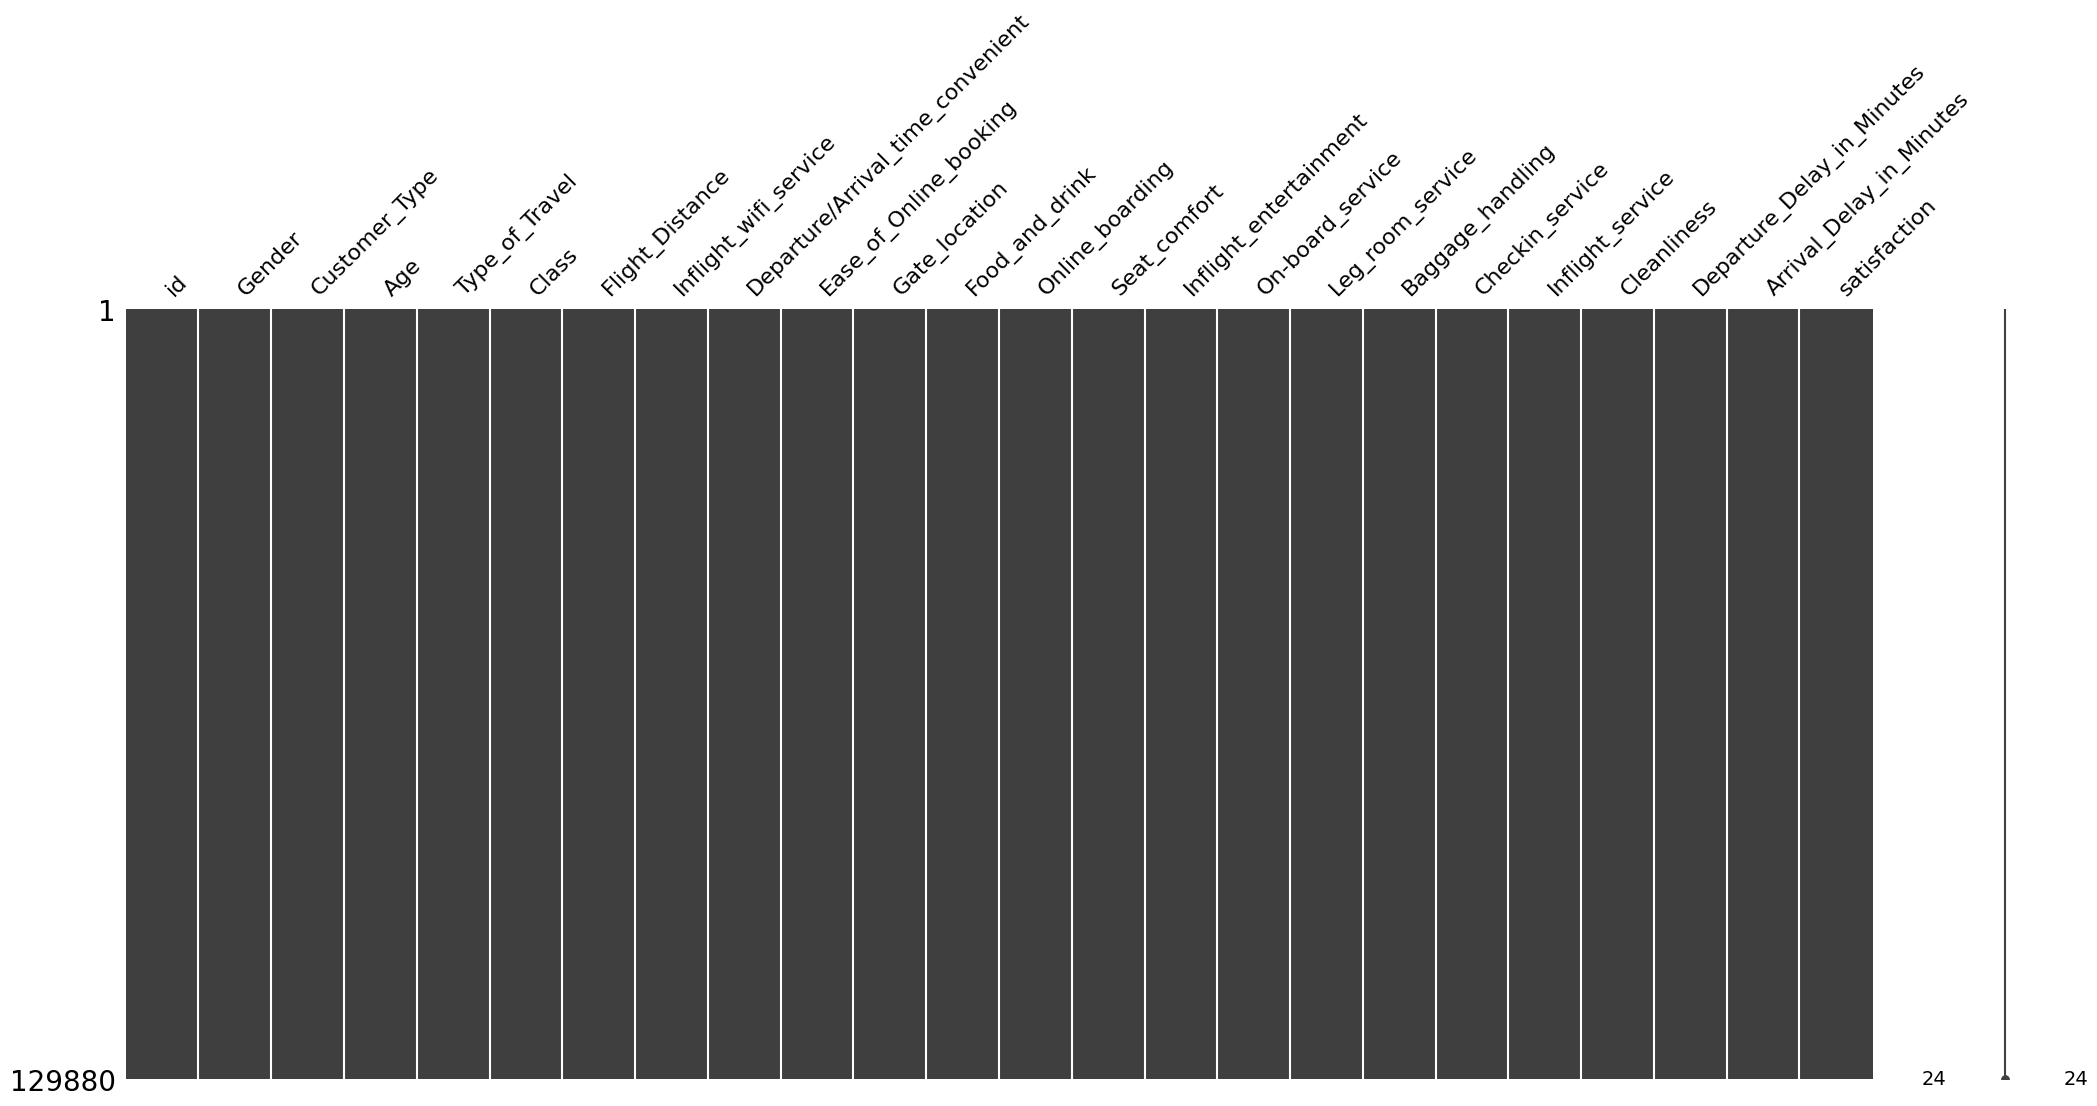

In [43]:
import missingno as msno
msno.matrix(df)

In [44]:
# Check for missing values by column and print columns with missing values
null_cols = df.columns[df.isnull().any()]
print("Columns with missing values:", null_cols)

Columns with missing values: Index([], dtype='object')


In [45]:
df.select_dtypes('object').columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'satisfaction'], dtype='object')

# Encoding Categorical Variables

In [106]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [107]:
lencoders

{'Gender': LabelEncoder(),
 'Customer_Type': LabelEncoder(),
 'Type_of_Travel': LabelEncoder(),
 'Class': LabelEncoder(),
 'satisfaction': LabelEncoder()}

In [48]:
df.head()

id  Gender  Customer_Type  Age  Type_of_Travel  Class  Flight_Distance  \
0   70172       1              0   13               1      2              460   
1    5047       1              1   25               0      0              235   
2  110028       0              0   26               0      0             1142   
3   24026       0              0   25               0      0              562   
4  119299       1              0   61               0      0              214   

   Inflight_wifi_service  Departure/Arrival_time_convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease_of_Online_booking  ...  Inflight_entertainment  On-board_service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg_room_service  Baggage_handling  Checkin_service  Inflight_service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

   satisfaction  
0             0  
1             0  
2             1  
3             0  
4             1  

[5 rows x 24 columns]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  int32  
 2   Customer_Type                      129880 non-null  int32  
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  int32  
 5   Class                              129880 non-null  int32  
 6   Flight_Distance                    129880 non-null  int64  
 7   Inflight_wifi_service              129880 non-null  int64  
 8   Departure/Arrival_time_convenient  129880 non-null  int64  
 9   Ease_of_Online_booking             129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Food_and_drink                     1298

# Top 10 feature selection through Chi-square

In [108]:
from sklearn import preprocessing

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df)

#modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)


modified_data = pd.DataFrame(r_scaler.transform(df), columns=df.columns)
modified_data.head()

id  Gender  Customer_Type       Age  Type_of_Travel  Class  \
0  0.540280     1.0            0.0  0.076923             1.0    1.0   
1  0.038852     1.0            1.0  0.230769             0.0    0.0   
2  0.847150     0.0            0.0  0.243590             0.0    0.0   
3  0.184980     0.0            0.0  0.230769             0.0    0.0   
4  0.918532     1.0            0.0  0.692308             0.0    0.0   

   Flight_Distance  Inflight_wifi_service  Departure/Arrival_time_convenient  \
0         0.086632                    0.6                                0.8   
1         0.041195                    0.6                                0.4   
2         0.224354                    0.4                                0.4   
3         0.107229                    0.4                                1.0   
4         0.036955                    0.6                                0.6   

   Ease_of_Online_booking  ...  Inflight_entertainment  On-board_service  \
0                     0.6  ...                     1.0               0.8   
1                     0.6  ...                     0.2               0.2   
2                     0.4  ...                     1.0               0.8   
3                     1.0  ...                     0.4               0.4   
4                     0.6  ...                     0.6               0.6   

   Leg_room_service  Baggage_handling  Checkin_service  Inflight_service  \
0               0.6              0.75              0.8               1.0   
1               1.0              0.50              0.2               0.8   
2               0.6              0.75              0.8               0.8   
3               1.0              0.50              0.2               0.8   
4               0.8              0.75              0.6               0.6   

   Cleanliness  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
0          1.0                    0.015704                  0.011364   
1          0.2                    0.000628                  0.003788   
2          1.0                    0.000000                  0.000000   
3          0.4                    0.006910                  0.005682   
4          0.6                    0.000000                  0.000000   

   satisfaction  
0           0.0  
1           0.0  
2           1.0  
3           0.0  
4           1.0  

[5 rows x 24 columns]

In [52]:
modified_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  float64
 1   Gender                             129880 non-null  float64
 2   Customer_Type                      129880 non-null  float64
 3   Age                                129880 non-null  float64
 4   Type_of_Travel                     129880 non-null  float64
 5   Class                              129880 non-null  float64
 6   Flight_Distance                    129880 non-null  float64
 7   Inflight_wifi_service              129880 non-null  float64
 8   Departure/Arrival_time_convenient  129880 non-null  float64
 9   Ease_of_Online_booking             129880 non-null  float64
 10  Gate_location                      129880 non-null  float64
 11  Food_and_drink                     1298

In [139]:
from sklearn.feature_selection import SelectKBest, chi2

X = modified_data.loc[:, modified_data.columns != 'satisfaction']
y = modified_data['satisfaction']  # Select the target variable as a Series instead of a DataFrame

selector = SelectKBest(chi2, k=10)
X_10_best = selector.fit_transform(X, y)

# Get the mask of selected features
selected_features_mask = selector.get_support()

# Get the names of selected features
selected_features = X.columns[selected_features_mask]

print("The 10 most important features selected by chi-square test:")
print(selected_features)

The 10 most important features selected by chi-square test:
Index(['Customer_Type', 'Type_of_Travel', 'Class', 'Flight_Distance',
       'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service'],
      dtype='object')


The above are the top 10 features impacting on passenger satisfaction. We will check feature importance with other methods as well.

# Feature Importance using Wrapper Method

In [141]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit_transform(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment']
[0.02982627 0.00372846 0.0351077  0.03001966 0.09962934 0.09740538
 0.03548689 0.1451688  0.01684855 0.03417839 0.01562977 0.01035443
 0.16376847 0.04785981 0.05398265 0.03344034 0.03323517 0.0216533
 0.02329963 0.02252789 0.02659254 0.00938332 0.01087326]


So only these six features are inherently important in contributing towards passenger satisfaction. However, we will again cross-check with another feature importance deciding method.

# Feature Permutation Importance


In [55]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

From all above results, finally we can combine and conclude the list of important features.

<u>*Really Important Featurues*</u>: Type_of_Travel, Inflight_wifi_service, Online_boarding, Seat_comfort

<u>*Important Features*</u>: Class, Flight_Distance, Inflight_entertainment, On-board_service, Leg_room_service, Cleanliness, Checkin_service, Inflight_service, Baggage_handling

# <u><b><font color='red'>Building the model</font></b></u>

## <font color='gold'>**Splitting the dataset**</font>

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=42)

In [145]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']

In [146]:

"""
# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()
"""

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [149]:
import time
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if not verbose:
        model.fit(X_train, y_train.ravel(), verbose=0)
    else:
        model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    time_taken = time.time() - t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))
    
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap=plt.cm.pink)
    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))
    
    return model, accuracy, roc_auc, time_taken

# <font color='turquoise'>**Model-1: Normal Logistic Regression**</font>

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [154]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [155]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8749807514628888


Accuracy = 0.8749807514628888
ROC Area under Curve = 0.8705029325616503
Time taken = 0.16399216651916504
              precision    recall  f1-score   support

           0    0.87721   0.90523   0.89100     29325
           1    0.87188   0.83577   0.85344     22627

    accuracy                        0.87498     51952
   macro avg    0.87454   0.87050   0.87222     51952
weighted avg    0.87488   0.87498   0.87464     51952



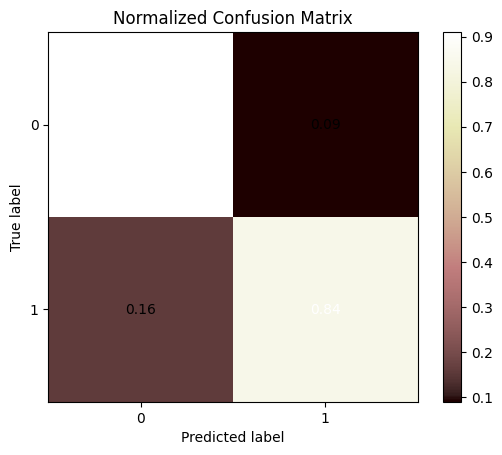

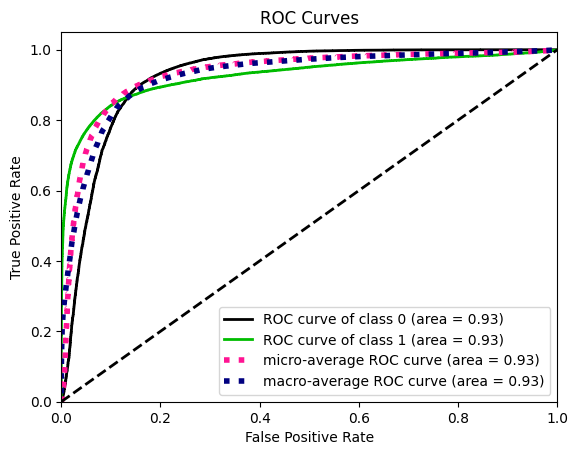

In [156]:
model_lr_1, accuracy_lr_1, roc_auc_lr_1, tt_lr_1 = run_model(model, X_train, y_train, X_test, y_test)

# <font color='orange'>**Model-2: Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)**</font>

Accuracy = 0.8749807514628888
ROC Area under Curve = 0.8705029325616503
Time taken = 0.9929945468902588
              precision    recall  f1-score   support

           0    0.87721   0.90523   0.89100     29325
           1    0.87188   0.83577   0.85344     22627

    accuracy                        0.87498     51952
   macro avg    0.87454   0.87050   0.87222     51952
weighted avg    0.87488   0.87498   0.87464     51952



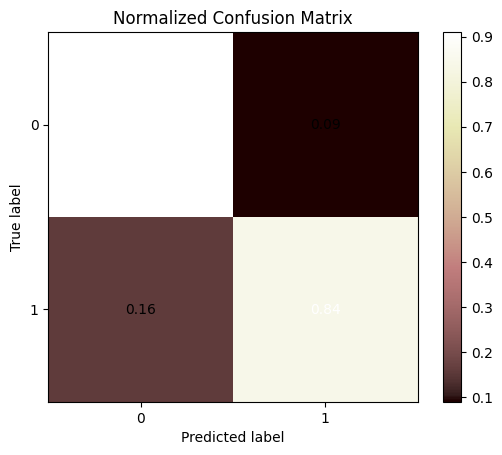

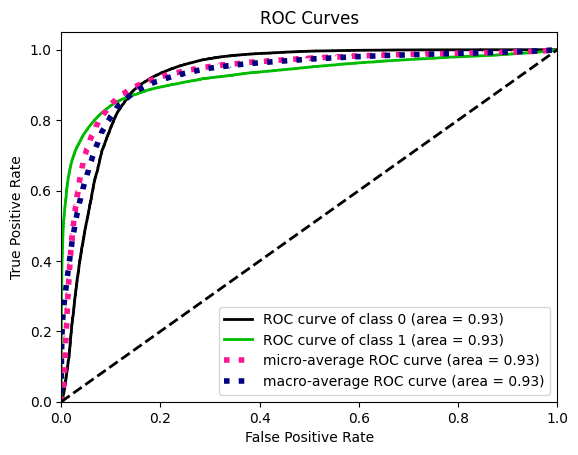

In [150]:
params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}
model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Since Logistic Regression is a white-box model (explainable), we can dive deeper into it to get more insight.

In [151]:
import statsmodels.api as sm

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.345746
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                77928
Model:                          Logit   Df Residuals:                    77905
Method:                           MLE   Df Model:                           22
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.4948
Time:                        22:03:20   Log-Likelihood:                -26943.
converged:                       True   LL-Null:                       -53329.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1272      0.011    -11.316      0.000      -0.149      -0.105
x2             0.0400      0.

We can see, among 12 features, except 6th feature (Inflight_entertainment), rest 11 features have p-value < 0.05. So these are really important features impacting highly towards the target variable. Also, a pseudo R-square value (McFadden's Pseudo R-Squared Value) of ~0.50 represents an excellent fit.

## Pycharet.....(edit this)